[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/4.3%20ETF%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%8B%9C%EA%B0%81%ED%99%94-input.ipynb)


## ETF 분석과 시각화

* keyword
    * seaborn - barplot, boxplot, violinplot
    * **seaborn PairGrid vs matplotlib - subplots**
    * seaborn FacetGrid
        * **catplot 범주형 데이터 시각화 (kind: count, bar, box, boxen, violin)**
        * relplot 연속된 수치 데이터 시각화 (kind: scatter, line) <= KRX 전체 종목 분석에서 다룸
    * pandas - value_counts, cross_tab, groupby, pivot_table
  
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)



* 특정 시점의 데이터를 저장해 분석합니다.
* 분석하는 시점에 따라 내용이 달라지는 점에 유의하세요!
* 내가 수집한 시점의 데이터를 분석하기 때문에 매일 분석한다면 일자별 리포트를 만들어 볼 수도 있을거에요.
* [ETF : 네이버 금융](https://finance.naver.com/sise/etf.nhn)


## ⚠️ 주의사항 ⚠️ 
*  분석내용은 데이터 수집 시점에 따라 달라집니다.

## 라이브러리 로드

In [1]:
# 필요한 도구를 로드합니다.
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# seaborn 의 버전을 확인합니다. 
# 0.11.0 이상의 버전에서 변경된 내용이 많으니 0.11 이상의 버전을 사용해 주세요.
sns.__version__

'0.11.2'

In [3]:
pd.__version__

'1.3.4'

## 시각화를 위한 한글폰트 설정

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
# 사용가능한 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# 운영체제에 맞는 font_family 찾기 
get_font_family()

'AppleGothic'

In [9]:
# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
# plt.style.use("bmh")



# ggplot으로 그래프 스타일 설정
plt.style.use("seaborn-whitegrid")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용


<AxesSubplot:title={'center':'한글폰트'}>

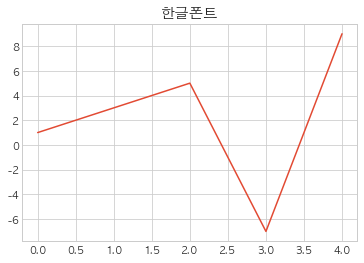

In [10]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")


## 데이터 로드

In [45]:
# 이전 수업에서 수집해서 저장해둔 csv 파일을 읽어옵니다.
# itemcode 숫자 앞의 0 이 지워진다면 
# dtype={"종목코드": np.object} 로 타입을 지정해 주면 문자형태로 읽어옵니다.
# df

df = pd.read_csv("etf_2021-11-24.csv",dtype={"종목코드": object})
df

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,39425,5,-175,-0.44,39456.0,-2.0239,1850963,73236,53815,국내 시장지수,KODEX,False,False,False
1,371460,4,TIGER 차이나전기차SOLACTIVE,20100,5,-225,-1.11,NaN,15.8779,3216944,65122,30287,해외 주식,TIGER,False,False,False
2,102110,1,TIGER 200,39445,5,-185,-0.47,39488.0,-1.9861,251033,9952,22188,국내 시장지수,TIGER,False,False,False
3,252670,3,KODEX 200선물인버스2X,2225,2,25,1.14,2222.0,2.3255,128211523,282593,20759,국내 파생,KODEX,True,False,False
4,153130,6,KODEX 단기채권,102990,5,-5,0.00,102986.0,0.1263,34183,3520,19435,채권,KODEX,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,285020,2,KBSTAR 200철강소재,8350,5,-115,-1.36,8359.0,-5.6825,8206,68,23,국내 업종/테마,KBSTAR,False,False,False
520,334700,5,KBSTAR 팔라듐선물인버스(H),5775,2,240,4.34,NaN,10.4790,3453,19,23,원자재,KBSTAR,True,False,True
521,287330,2,KBSTAR 200생활소비재,7755,5,-40,-0.51,7756.0,-7.7515,201,1,20,국내 업종/테마,KBSTAR,False,False,False
522,287310,2,KBSTAR 200경기소비재,10685,5,-120,-1.11,10684.0,-1.8174,12,0,15,국내 업종/테마,KBSTAR,False,False,False


In [15]:
# 인덱스 번호 상단 5개의 데이터를 가져옵니다.
# 제대로 read되었는지 각 column정보들을 확인합니다.
df.head()


,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,39425,5,-175,-0.44,39456.0,-2.0239,1850963,73236,53815,국내 시장지수,KODEX,False,False,False
1,371460,4,TIGER 차이나전기차SOLACTIVE,20100,5,-225,-1.11,NaN,15.8779,3216944,65122,30287,해외 주식,TIGER,False,False,False
2,102110,1,TIGER 200,39445,5,-185,-0.47,39488.0,-1.9861,251033,9952,22188,국내 시장지수,TIGER,False,False,False
3,252670,3,KODEX 200선물인버스2X,2225,2,25,1.14,2222.0,2.3255,128211523,282593,20759,국내 파생,KODEX,True,False,False
4,153130,6,KODEX 단기채권,102990,5,-5,0.00,102986.0,0.1263,34183,3520,19435,채권,KODEX,False,False,False


In [16]:
# 인덱스 하단의 5개 데이터를 가져옵니다.
# 데이터가 제대로 로드되었는지 확인합니다.
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
519,285020,2,KBSTAR 200철강소재,8350,5,-115,-1.36,8359.0,-5.6825,8206,68,23,국내 업종/테마,KBSTAR,False,False,False
520,334700,5,KBSTAR 팔라듐선물인버스(H),5775,2,240,4.34,NaN,10.4790,3453,19,23,원자재,KBSTAR,True,False,True
521,287330,2,KBSTAR 200생활소비재,7755,5,-40,-0.51,7756.0,-7.7515,201,1,20,국내 업종/테마,KBSTAR,False,False,False
522,287310,2,KBSTAR 200경기소비재,10685,5,-120,-1.11,10684.0,-1.8174,12,0,15,국내 업종/테마,KBSTAR,False,False,False
523,287320,2,KBSTAR 200산업재,10670,5,-95,-0.88,10692.0,-12.9750,44,0,13,국내 업종/테마,KBSTAR,False,False,False


In [17]:
# info를 통해서 각 column들의 데이터타입과 결측치, 메모리 사용량 등을 볼 수 있습니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        524 non-null    object 
 1   탭코드         524 non-null    int64  
 2   종목명         524 non-null    object 
 3   현재가         524 non-null    int64  
 4   등락구분        524 non-null    int64  
 5   전일비         524 non-null    int64  
 6   등락률         524 non-null    float64
 7   순자산가치(NAV)  372 non-null    float64
 8   3개월수익률      499 non-null    float64
 9   거래량         524 non-null    int64  
 10  거래대금(백만)    524 non-null    int64  
 11  시가총액(억)     524 non-null    int64  
 12  유형          524 non-null    object 
 13  브랜드         524 non-null    object 
 14  인버스         524 non-null    bool   
 15  레버리지        524 non-null    bool   
 16  환헤지H        524 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 59.0+ KB


## 결측치 확인

In [21]:
(True + True + False) / 3
# True == 1 

0.6666666666666666

In [25]:
# 결측치를 확인합니다.

df.isnull().sum()
# df.notnull().sum()

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    152
3개월수익률         25
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지H            0
dtype: int64

In [28]:
# 결측치의 비율을 봅니다.
df.isnull().mean() *100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    29.007634
3개월수익률         4.770992
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지H           0.000000
dtype: float64

<AxesSubplot:>

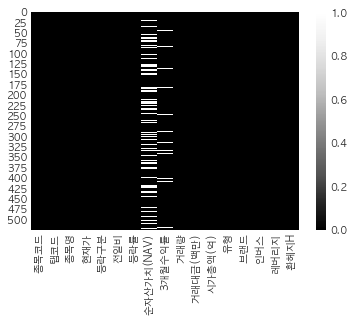

In [33]:
# heatmap을 통한 결측치 시각화
# 흰색 - null  ,  검은색 not null

plt.figsize = (10,4)
sns.heatmap(df.isnull(), cmap= "Greys_r")


## 범주형 데이터의 빈도수
### 범주형 변수 찾기

In [37]:
# describe를 통해 범주형 변수에 대한 기술통계 값을 구하기
# object 타입인 자료만  가져옴 
df.describe(include = object)



,종목코드,종목명,유형,브랜드
count,524,524,524,524
unique,524,524,7,19
top,069500,KODEX 200,국내 업종/테마,TIGER
freq,1,1,200,133


In [39]:
# unique(중복을 제외한 값)에 대한 빈도수 구하기
# object type 이 아니더라도 nunique 값이 작다면 범주형 변수인지 확인해 봅니다.

df.nunique()


종목코드          524
탭코드             7
종목명           524
현재가           488
등락구분            3
전일비           111
등락률           226
순자산가치(NAV)    368
3개월수익률        498
거래량           457
거래대금(백만)      280
시가총액(억)       376
유형              7
브랜드            19
인버스             2
레버리지            2
환헤지H            2
dtype: int64

### ETF 상품 유형별 빈도수(한 개의 변수)

In [43]:
# df["유형"].value_counts() 의 결과와 같게 시각화 할 수 있습니다.
 df["유형"].value_counts()


<AxesSubplot:xlabel='count', ylabel='유형'>

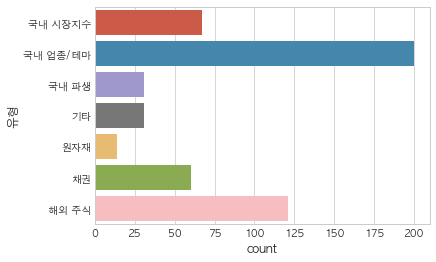

In [47]:
# sns.countplot 으로 빈도수를 시각화 합니다.
# sns.countplot(data = df, y="유형", order = df["유형"].value_counts().index)

#가나다 순 
sns.countplot(data =df.sort_values("유형"),y= "유형  

In [48]:
# value_counts 로 빈도수를 직접 계산합니다.
# normalize - 비율 로 

df['유형'].value_counts(normalize= True)* 100

국내 업종/테마    38.167939
해외 주식       23.091603
국내 시장지수     12.786260
채권          11.450382
국내 파생        5.916031
기타           5.916031
원자재          2.671756
Name: 유형, dtype: float64

In [ ]:
# value_counts(normalize=True) 로 빈도수의 비율을 구합니다.
df['유형'].value_counts(normalize= True)* 100

### 두 개의 변수 빈도수와 비율

<AxesSubplot:xlabel='count', ylabel='유형'>

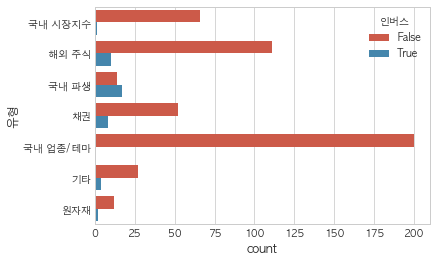

In [51]:
# 유형 컬럼의 빈도수를 봅니다.
# seaborn countplot의 hue를 이용하여 인버스여부에 따라 다른 색상으로 표시해 봅니다.

# hue - 범주형 데이터만 - 수치형은 부적합 - 각각 그래프 다 그려야 하니까 

sns.countplot(data = df , y = "유형", hue = "인버스")



In [55]:
# pandas crosstab을 이용하여 위 그래프의 수치를 확인 할 수 있습니다.
# seaborn 은 아래와 같은 연산을 하지 않더라도 알아서 통계적 연산을 시각화 해줍니다.

pd.crosstab(df["인버스"],df["유형"],normalize=True)


유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,0.125954,0.381679,0.026718,0.051527,0.022901,0.099237,0.211832
True,0.001908,0.000000,0.032443,0.007634,0.003817,0.015267,0.019084


In [ ]:
# value_counts 처럼 normalize 를 사용해 비율을 구할 수도 있습니다.
pd.crosstab(df["인버스"],df["유형"],normalize=True)

<AxesSubplot:xlabel='count', ylabel='유형'>

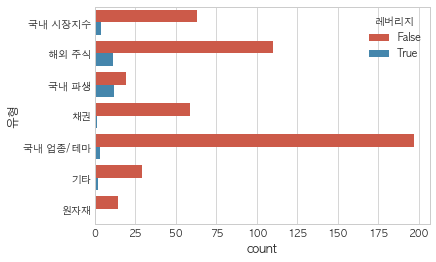

In [57]:
# 동일하게 유형 데이터를 레버리지 여부에 따라 그립니다.
sns.countplot(data = df , y= "유형", hue ="레버리지")

In [58]:
# 레버리지, 유형에 대한 빈도수를 구힙니다.


pd.crosstab(df["레버리지"],df["유형"])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,63,197,19,29,14,59,110
True,4,3,12,2,0,1,11


In [59]:
# 레버리지, 유형에 대한 빈도수의 비율을 구합니다.
pd.crosstab(df["레버리지"],df["유형"],normalize=True)

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,0.120229,0.375954,0.036260,0.055344,0.026718,0.112595,0.209924
True,0.007634,0.005725,0.022901,0.003817,0.000000,0.001908,0.020992


### 브랜드별 빈도수

<AxesSubplot:xlabel='count', ylabel='브랜드'>

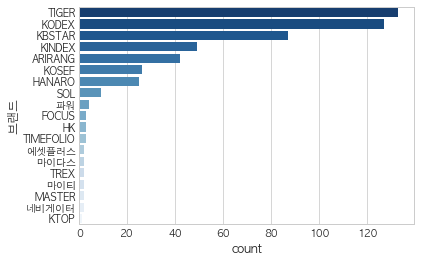

In [69]:
# 브랜드별 ETF 빈도수

sns.countplot(data = df , y ="브랜드", order = df["브랜드"].value_counts().index, palette = "Blues_r")

In [63]:
df["브랜드"].value_counts().index

Index(['TIGER', 'KODEX', 'KBSTAR', 'KINDEX', 'ARIRANG', 'KOSEF', 'HANARO',
       'SOL', '파워', 'FOCUS', 'HK', 'TIMEFOLIO', '에셋플러스', '마이다스', 'TREX', '마이티',
       'MASTER', '네비게이터', 'KTOP'],
      dtype='object')

### 인버스, 브랜드의 ETF 빈도 비율


* 인버스 ETF란? 주식관련 장내 외 파생상품 투자 및 증권차입매도 등을 통해 기초지수(KOSPI 200지수)의 일일 변동률(일별수익률)을 음의 1배수 즉, 역방향으로 추적하는 ETF를 말한다. 예를 들어, KOSPI 200지수가 1% 상승할 경우 인버스 ETF는 마이너스 1% 수익률, 반대로 KOSPI 200 지수가 1% 하락시 인버스 ETF는 플러스 1%의 수익률을 목표로 운영된다.
[네이버 지식백과] 인버스ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=20336&cid=43659&categoryId=43659

<AxesSubplot:xlabel='count', ylabel='브랜드'>

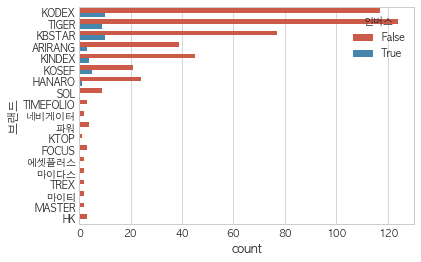

In [71]:
# 브랜드 column의 빈도수를 인버스에 따른 구분으로 그려봅니다.

sns.countplot(data=df, y = "브랜드", hue = "인버스")


In [77]:
# 인버스, 브랜드의 금융상품 빈도수

in_brand_norm = pd.crosstab(df["인버스"],df["브랜드"], normalize=True) * 100


In [ ]:
# 인버스, 브랜드의 금융상품 빈도 비율
# in_brand_norm


### 레버리지, 브랜드의 ETF 빈도 비율
* 레버리지 ETF란? 일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험ㆍ고수익 상품으로 분류된다.
[네이버 지식백과] 레버리지 ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=2059802&cid=43659&categoryId=43659

<AxesSubplot:xlabel='count', ylabel='브랜드'>

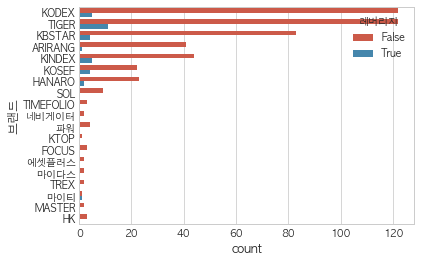

In [78]:
# 브랜드별 레버리지 여부에 따른 빈도수를 시각화 합니다.

sns.countplot(data=df, y = "브랜드", hue = "레버리지")

In [84]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)


pd.crosstab(df["레버리지"],df["브랜드"])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,SOL,TIGER,TIMEFOLIO,TREX,네비게이터,마이다스,마이티,에셋플러스,파워
레버리지,,,,,,,,,,,,,,,,,,,
False,41,3,23,3,83,44,122,22,1,2,9,122,3,2,2,2,1,2,4
True,1,0,2,0,4,5,5,4,0,0,0,11,0,0,0,0,1,0,0


<AxesSubplot:ylabel='브랜드'>

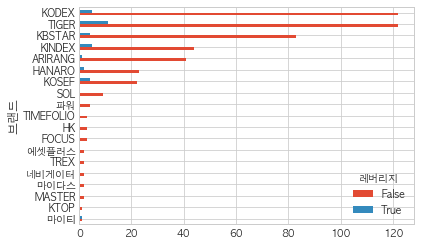

In [88]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df["레버리지"],df["브랜드"]).T.sort_values(by=False).plot.barh()

In [83]:
# 레버리지, 브랜드의 ETF 비율
pd.crosstab(df["레버리지"],df["브랜드"],normalize=True) * 100

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,SOL,TIGER,TIMEFOLIO,TREX,네비게이터,마이다스,마이티,에셋플러스,파워
레버리지,,,,,,,,,,,,,,,,,,,
False,7.824427,0.572519,4.389313,0.572519,15.839695,8.396947,23.282443,4.198473,0.19084,0.381679,1.717557,23.282443,0.572519,0.381679,0.381679,0.381679,0.19084,0.381679,0.763359
True,0.190840,0.000000,0.381679,0.000000,0.763359,0.954198,0.954198,0.763359,0.00000,0.000000,0.000000,2.099237,0.000000,0.000000,0.000000,0.000000,0.19084,0.000000,0.000000


## 수치형 변수의 기술통계

In [97]:
# describe로 수치형 변수의 기술통계 구하기
# desc
desc = df.describe()


## 수치형 변수로 히스토그램 그리기

* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [99]:
# 수치형 컬럼만 리스트로 만들기
# desc - 수치형 데이터만 들어감 - 계산을 위해서 

num_cols = desc.columns.tolist()
num_cols



['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

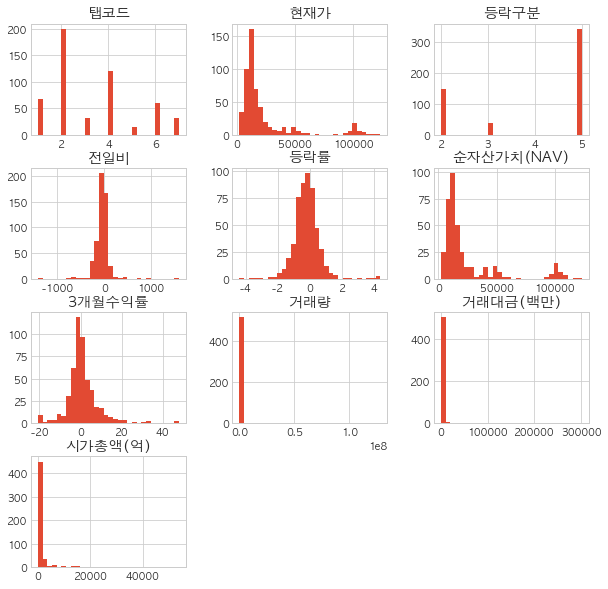

In [104]:
# 히스토그램을 그려보면 수치 데이터로 되어있지만 범주형 데이터를 찾아볼 수 있습니다.
g= df[num_cols].hist(figsize = (10,10) ,bins = 30)

## 범주형 vs 수치형 변수
### seaborn의 barplot 이해하기

Text(0.5, 1.0, '브랜드별 3개월 평균 수익률')

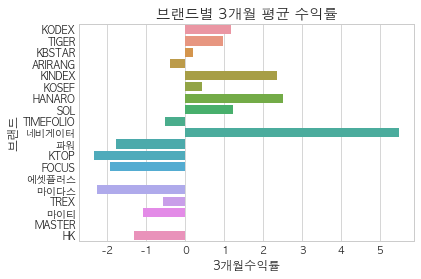

In [111]:
# seaborn의 bar chart를 이용하여 각 브랜드에 대한 3개월수익률의 평균값을 볼 수 있습니다.
# 검은색 막대는 ci로 신뢰구간을 의미합니다.

sns.barplot(data=df,y="브랜드",x = "3개월수익률",
            ci=None).set_title("브랜드별 3개월 평균 수익률")


### barplot 그래프의 값을 groupby 로 직접 구하기

In [115]:
# 위 그래프의 평균 값을 직접 계산을 통해 구해 봅니다.
# brand_3month_mean

brand_3month_mean = df.groupby("브랜드")["3개월수익률"].mean()
brand_3month_mean

브랜드
ARIRANG     -0.387938
FOCUS       -1.918850
HANARO       2.512177
HK          -1.324600
KBSTAR       0.194394
KINDEX       2.355888
KODEX        1.179625
KOSEF        0.421750
KTOP        -2.326800
MASTER            NaN
SOL          1.215520
TIGER        0.957350
TIMEFOLIO   -0.526050
TREX        -0.561750
네비게이터        5.472850
마이다스        -2.266000
마이티         -1.070150
에셋플러스             NaN
파워          -1.769350
Name: 3개월수익률, dtype: float64

<AxesSubplot:title={'center':'브랜드별 평균 3개월 수익률'}, ylabel='브랜드'>

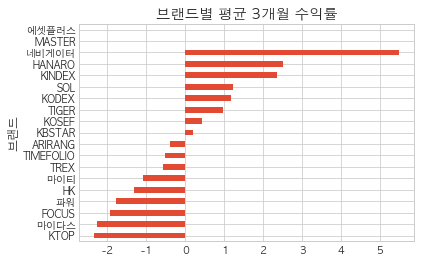

In [116]:
# 위에서 구한 그룹(브랜드)별 평균 3개월 수익률을 그래프로 표현합니다.
brand_3month_mean.sort_values().plot.barh(title = "브랜드별 평균 3개월 수익률")

In [118]:
# 브랜드가 마이티인 경우의 데이터를 확인합니다.
df[df["브랜드"] == "마이티"]

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
393,159800,1,마이티 코스피100,30240,3,0,0.0,30058.0,-2.4831,0,0,85,국내 시장지수,마이티,False,False,False
454,292340,2,마이티 200커버드콜ATM레버리지,10245,3,0,0.0,10235.0,0.3428,0,0,61,국내 업종/테마,마이티,False,True,False


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

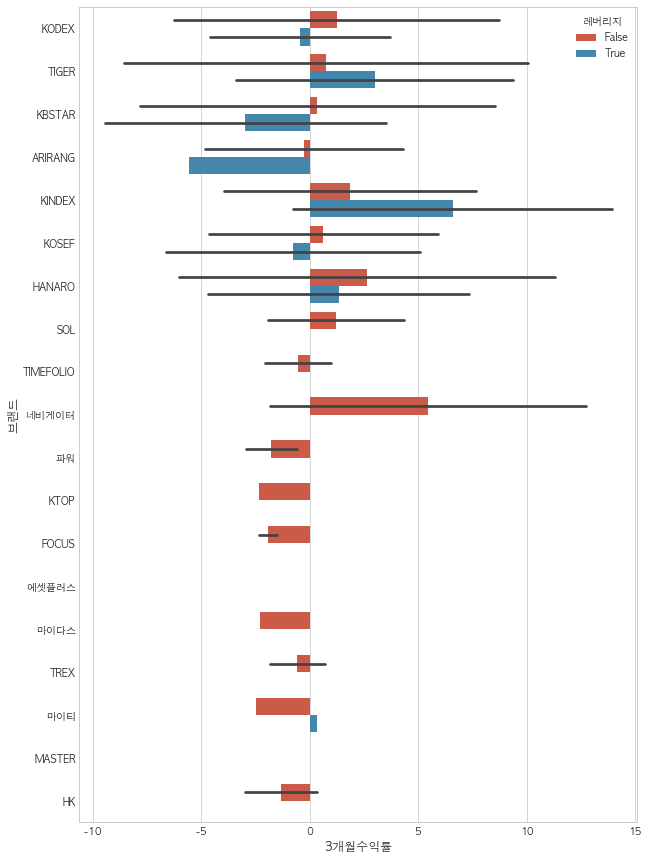

In [127]:
# 브랜드 대비 3개월수익률에 대한 정보를 레버리지 값의 차이를 barplot으로 봅니다.
# 레버리지 유/무에 따라서 평균 3개월 수익률은 많은 차이가 없지만,
# 표준편차의 경우 레버리지가 있을경우 굉장히 편차(ci="sd")가 심함을 알 수 있습니다.
# 레버리지 상품은 오를 때 더 많이 오르고 내릴 때 더 많이 내립니다.

plt.figure(figsize = (10,15))
sns.barplot(data=df, x= '3개월수익률', y= "브랜드", hue ="레버리지", ci = "sd")


* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [137]:
# 위에서 그린 그래프의 값을 groupby로 구합니다.

g= df.groupby(['브랜드',"레버리지"])["3개월수익률"].mean().to_frame()
g.style.background_gradient(cmap="Greens")

### boxplot으로 그리기

#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

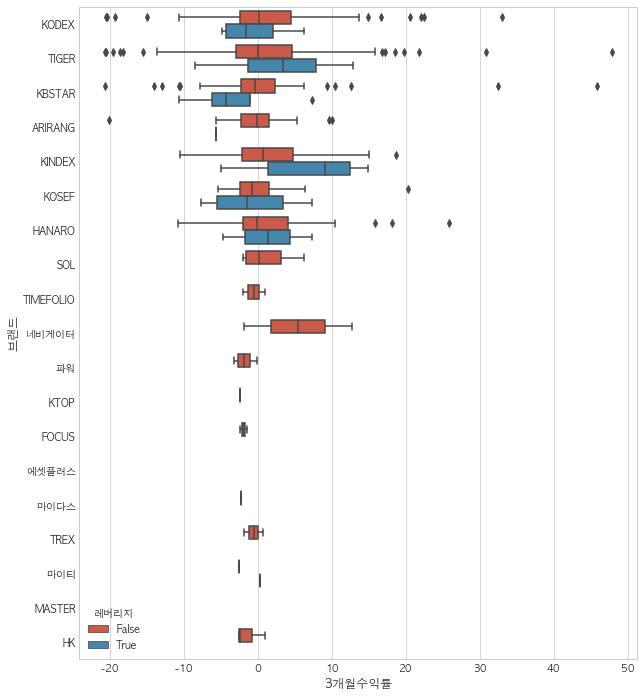

In [146]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화 합니다.

plt.figure(figsize=(10,12))
sns.boxplot(data =df, x = "3개월수익률", y = "브랜드", hue= "레버리지")


#### boxplot 보는 방법

* 사분위수 범위(IQR, Interquartile range, Q3-Q1)
* 이상치를 제외한 최댓값  = Q3 + 1.5IQR
* 이상치를 제외한 최솟값  = Q1 - 1.5IQR

### 3개월 수익률에 대한 기술통계 값 구하기

In [153]:
# 위에서 그린 boxplot의 값을 직접 구해봅니다.
# brand_3month_desc
brand_3month_desc = df.groupby(["브랜드","레버리지"])["3개월수익률"].describe()
brand_3month_desc

count      mean        std      min       25%      50%  \
브랜드       레버리지                                                            
ARIRANG   False   41.0 -0.261451   4.616788 -20.0362 -2.283600 -0.13350   
          True     1.0 -5.573900        NaN  -5.5739 -5.573900 -5.57390   
FOCUS     False    2.0 -1.918850   0.607334  -2.3483 -2.133575 -1.91885   
HANARO    False   20.0  2.629360   8.892056 -10.7222 -1.979350 -0.13045   
          True     2.0  1.340350   8.512505  -4.6789 -1.669275  1.34035   
HK        False    3.0 -1.324600   2.048520  -2.5642 -2.506850 -2.44950   
KBSTAR    False   78.0  0.356551   8.221997 -20.6887 -2.228225 -0.42860   
          True     4.0 -2.967675   7.489075 -10.5949 -6.175450 -4.30640   
KINDEX    False   43.0  1.863893   5.862710 -10.5039 -2.111450  0.73640   
          True     5.0  6.587040   8.209868  -4.9114  1.372700  9.10810   
KODEX     False  119.0  1.248057   7.531676 -20.4413 -2.363100  0.18990   
          True     5.0 -0.449060   4.650193  -4.7696 -4.275500 -1.59410   
KOSEF     False   22.0  0.635945   5.406055  -5.3159 -2.376475 -0.74220   
          True     4.0 -0.756325   6.756586  -7.5974 -5.522525 -1.38645   
KTOP      False    1.0 -2.326800        NaN  -2.3268 -2.326800 -2.32680   
MASTER    False    0.0       NaN        NaN      NaN       NaN      NaN   
SOL       False    5.0  1.215520   3.486982  -1.9899 -1.575500  0.17430   
TIGER     False  120.0  0.770572   9.345906 -20.6944 -2.886750  0.01515   
          True    11.0  2.994927   6.685594  -8.4314 -1.333900  3.48590   
TIMEFOLIO False    2.0 -0.526050   2.138503  -2.0382 -1.282125 -0.52605   
TREX      False    2.0 -0.561750   1.774202  -1.8163 -1.189025 -0.56175   
네비게이터     False    2.0  5.472850  10.296535  -1.8079  1.832475  5.47285   
마이다스      False    1.0 -2.266000        NaN  -2.2660 -2.266000 -2.26600   
마이티       False    1.0 -2.483100        NaN  -2.4831 -2.483100 -2.48310   
          True     1.0  0.342800        NaN   0.3428  0.342800  0.34280   
에셋플러스     False    0.0       NaN        NaN      NaN       NaN      NaN   
파워        False    4.0 -1.769350   1.364306  -3.1945 -2.639350 -1.91170   

                       75%      max  
브랜드       레버리지                       
ARIRANG   False   1.544400  10.0679  
          True   -5.573900  -5.5739  
FOCUS     False  -1.704125  -1.4894  
HANARO    False   4.076125  25.8791  
          True    4.349975   7.3596  
HK        False  -0.704800   1.0399  
KBSTAR    False   2.365975  45.9288  
          True   -1.098625   7.3370  
KINDEX    False   4.785050  18.7046  
          True   12.428700  14.9371  
KODEX     False   4.484650  33.0550  
          True    2.110500   6.2834  
KOSEF     False   1.563575  20.3429  
          True    3.379750   7.3450  
KTOP      False  -2.326800  -2.3268  
MASTER    False        NaN      NaN  
SOL       False   3.197600   6.2711  
TIGER     False   4.633875  47.8672  
          True    7.898950  12.9081  
TIMEFOLIO False   0.230025   0.9861  
TREX      False   0.065525   0.6928  
네비게이터     False   9.113225  12.7536  
마이다스      False  -2.266000  -2.2660  
마이티       False  -2.483100  -2.4831  
          True    0.342800   0.3428  
에셋플러스     False        NaN      NaN  
파워        False  -1.041700  -0.0595

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### KODEX ETF 따로 분석하기

* ⚠️ 주의사항 ⚠️  분석내용은 데이터 수집 시점에 따라 달라집니다.

In [158]:
# KODEX 서브셋을 만듭니다.

KODEX = df[df["브랜드"] == "KODEX"]
KODEX


,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,39425,5,-175,-0.44,39456.0,-2.0239,1850963,73236,53815,국내 시장지수,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2225,2,25,1.14,2222.0,2.3255,128211523,282593,20759,국내 파생,KODEX,True,False,False
4,153130,6,KODEX 단기채권,102990,5,-5,0.00,102986.0,0.1263,34183,3520,19435,채권,KODEX,False,False,False
5,122630,3,KODEX 레버리지,23525,5,-235,-0.99,23589.0,-4.7696,12726430,301683,18867,국내 파생,KODEX,False,True,False
7,278540,1,KODEX MSCI Korea TR,12680,5,-75,-0.59,12694.0,-1.8847,297245,3804,16028,국내 시장지수,KODEX,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,321410,7,KODEX 멀티에셋하이인컴(H),10845,5,-50,-0.46,NaN,-0.5023,65,0,54,기타,KODEX,False,False,True
475,292770,6,KODEX 국채선물3년인버스,50530,3,0,0.00,50521.0,1.7007,0,0,52,채권,KODEX,True,False,False
480,261270,7,KODEX 미국달러선물인버스,9630,3,0,0.00,9640.0,-1.1801,5246,50,49,기타,KODEX,True,False,False
492,280940,4,KODEX 골드선물인버스(H),7210,2,50,0.70,NaN,-1.7833,2376,17,43,해외 주식,KODEX,True,False,True


0     -2.0239
3      2.3255
4      0.1263
5     -4.7696
7     -1.8847
        ...  
473   -0.5023
475    1.7007
480   -1.1801
492   -1.7833
501    1.5609
Name: 3개월수익률, Length: 127, dtype: float64

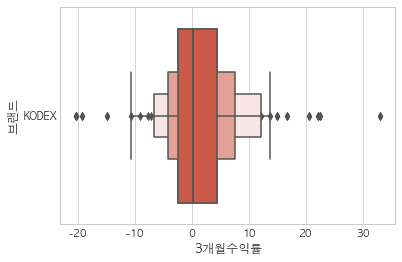

In [161]:
# KODEX 의 boxplot을 그립니다.
# 다이아 - 1QR 3Qr 벗어나면 이상치 

sns.boxplot(data = KODEX, x= "3개월수익률", y = "브랜드")

# 좀 더 분포를 자세하게 표현 
sns.boxenplot(data = KODEX, x= "3개월수익률", y = "브랜드")





In [ ]:
# KODEX 의 boxenplot을 그립니다.



<AxesSubplot:>

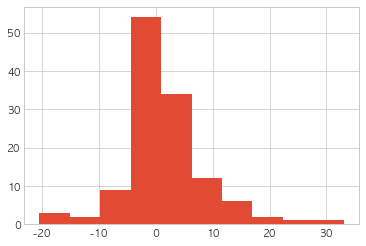

In [162]:
# KODEX 의 historam 을 pandas로 그립니다.


KODEX["3개월수익률"].hist()

<AxesSubplot:xlabel='3개월수익률', ylabel='Density'>

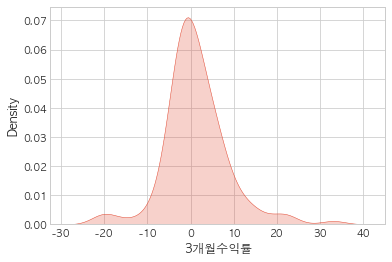

In [165]:
# KODEX 의 kdeplot 을 그립니다. 
# hist -> 밀도 추정 

sns.kdeplot(data = KODEX, x= "3개월수익률", shade = True)


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

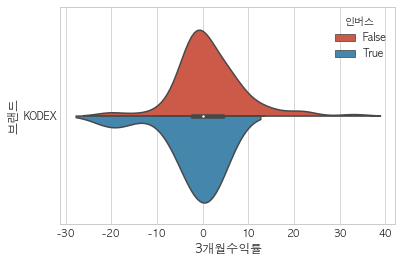

In [172]:
# KODEX 의 violinplot 을 그립니다.
# boxplot에서 분포를 파악하기 어려운 점을 보완하기 위해 등장 

sns.violinplot(data = KODEX, x= "3개월수익률",y= "브랜드",shade = True, hue="인버스",split=True)

# 안에 검은색 박스 플롯 있음 
# 하얀점은 중앙값 

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

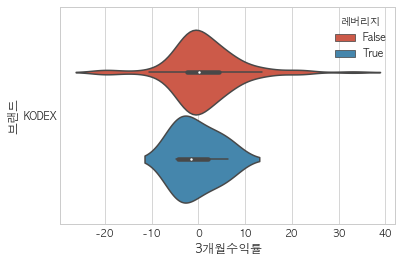

In [173]:
# KODEX 의 violinplot 에 hue="레버리지"로 그립니다.
sns.violinplot(data = KODEX, x= "3개월수익률",y= "브랜드",shade = True, hue="레버리지")


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

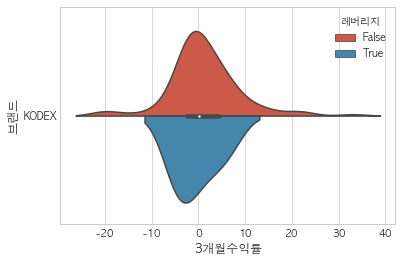

In [174]:
# KODEX 의 violinplot 에 hue="레버리지"를 split 옵션을 사용해 그립니다.
sns.violinplot(data = KODEX, x= "3개월수익률",y= "브랜드",shade = True, hue="레버리지",split=True)


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

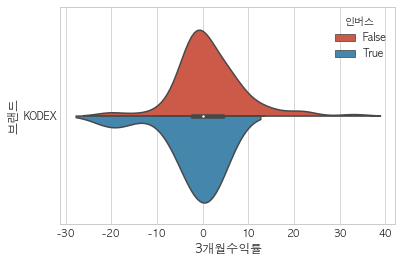

In [175]:
# KODEX 의 violinplot 에 hue="인버스"로 그립니다.
sns.violinplot(data = KODEX, x= "3개월수익률",y= "브랜드",shade = True, hue="인버스",split=True)


* 이미지 출처 : [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

<img src="https://d2f99xq7vri1nk.cloudfront.net/BoxViolinSmaller.gif">

### 브랜드별 3개월수익률

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

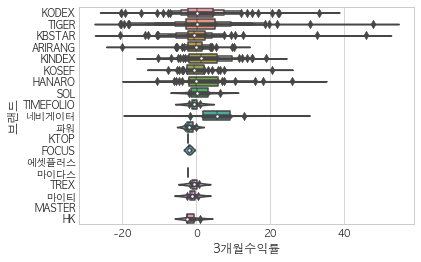

In [177]:
# boxenplot 을 통해 브랜드별 3개월 수익률을 시각화 합니다.

sns.boxenplot(data= df , x= "3개월수익률", y="브랜드")


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

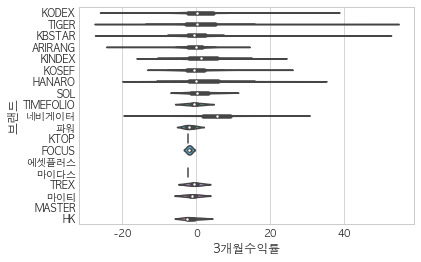

In [179]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
sns.violinplot(data= df , x= "3개월수익률", y="브랜드")

### 서브플롯 그려보기

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

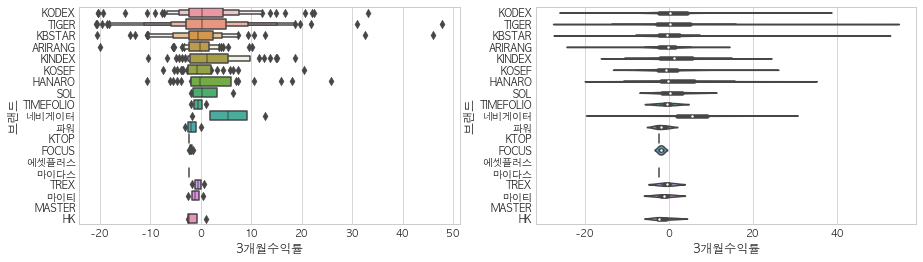

In [188]:
# boxplot과 violinplot을 하나의 그래프에 같이 그려봅니다.
# figure =1개 
#plt.subplots(nrows=2,ncols=2)
fig , axes = plt.subplots(ncols=2, figsize = (15,4))

sns.boxenplot(data= df , x= "3개월수익률", y="브랜드", ax= axes[0])
sns.violinplot(data=df, x="3개월수익률", y="브랜드", ax= axes[1])

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

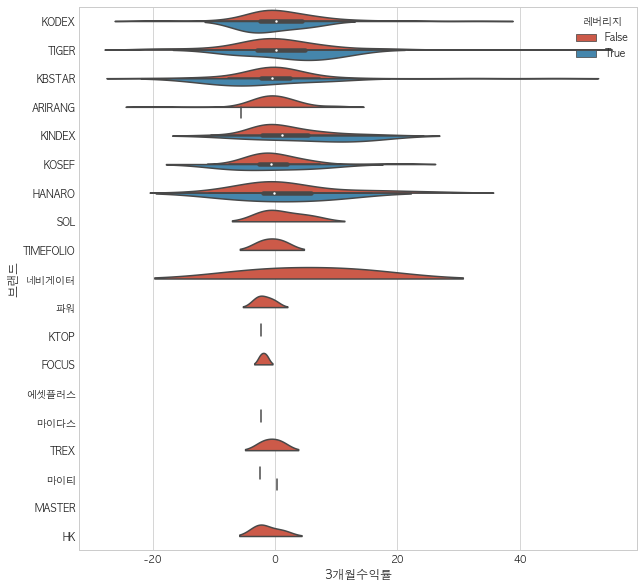

In [190]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
# 브랜드별 3개월수익률을 레버리지 여부에 따라 그려봅니다.

plt.figure(figsize= (10,10))

sns.violinplot(data= df, x= "3개월수익률", y="브랜드", hue="레버리지", split =True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

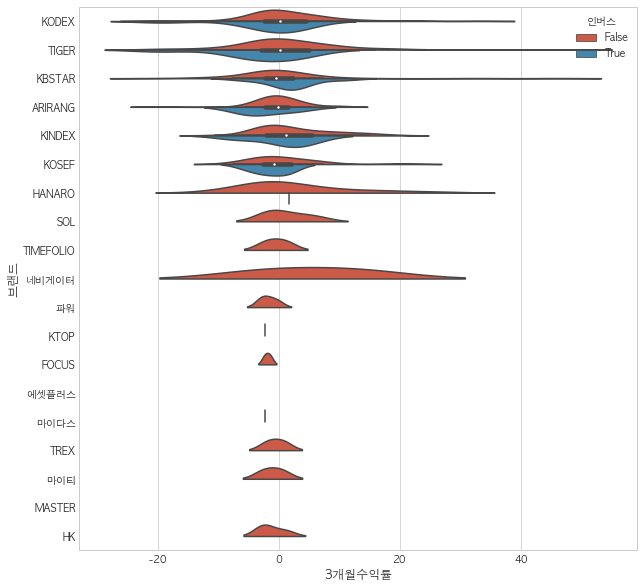

In [191]:
# 브랜드별 3개월수익률을 인버스 여부에 따라 그려봅니다.

plt.figure(figsize= (10,10))

sns.violinplot(data= df, x= "3개월수익률", y="브랜드", hue="인버스", split =True)

### 브랜드별 거래량

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

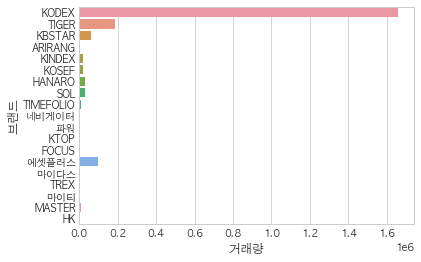

In [193]:
# 수집한 날짜에 대한 브랜드별 거래량을 봅니다.

sns.barplot(data= df, x= "거래량", y= '브랜드',ci=None)

In [198]:
# 거래량이 많은 자료만 그리기 
df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])]



,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
1,371460,4,TIGER 차이나전기차SOLACTIVE,20100,5,-225,-1.11,NaN,15.8779,3216944,65122,30287,해외 주식,TIGER,False,False,False
2,102110,1,TIGER 200,39445,5,-185,-0.47,39488.0,-1.9861,251033,9952,22188,국내 시장지수,TIGER,False,False,False
6,133690,4,TIGER 미국나스닥100,86770,5,-260,-0.30,NaN,9.3712,238589,20700,16556,해외 주식,TIGER,False,False,False
9,157450,6,TIGER 단기통안채,100420,5,-10,-0.01,100422.0,0.1595,14406,1446,15519,채권,TIGER,False,False,False
11,310970,1,TIGER MSCI Korea TR,15925,5,-35,-0.22,15943.0,-2.4450,88,1,13918,국내 시장지수,TIGER,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,285020,2,KBSTAR 200철강소재,8350,5,-115,-1.36,8359.0,-5.6825,8206,68,23,국내 업종/테마,KBSTAR,False,False,False
520,334700,5,KBSTAR 팔라듐선물인버스(H),5775,2,240,4.34,NaN,10.4790,3453,19,23,원자재,KBSTAR,True,False,True
521,287330,2,KBSTAR 200생활소비재,7755,5,-40,-0.51,7756.0,-7.7515,201,1,20,국내 업종/테마,KBSTAR,False,False,False
522,287310,2,KBSTAR 200경기소비재,10685,5,-120,-1.11,10684.0,-1.8174,12,0,15,국내 업종/테마,KBSTAR,False,False,False


<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

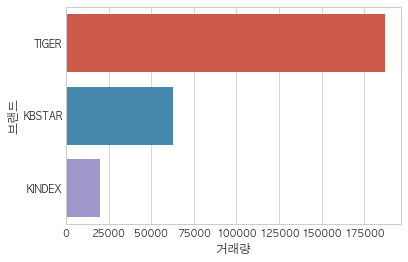

In [197]:
# 전체 브랜드를 보면 값의 크기 차이로 시각화를 제대로 보기 어렵습니다.
# 일부 브랜드 "TIGER", "KBSTAR", "KINDEX" 를 따로 가져와서 시각화 합니다.
sns.barplot(data= df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], x= "거래량", y= '브랜드',ci=None)

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

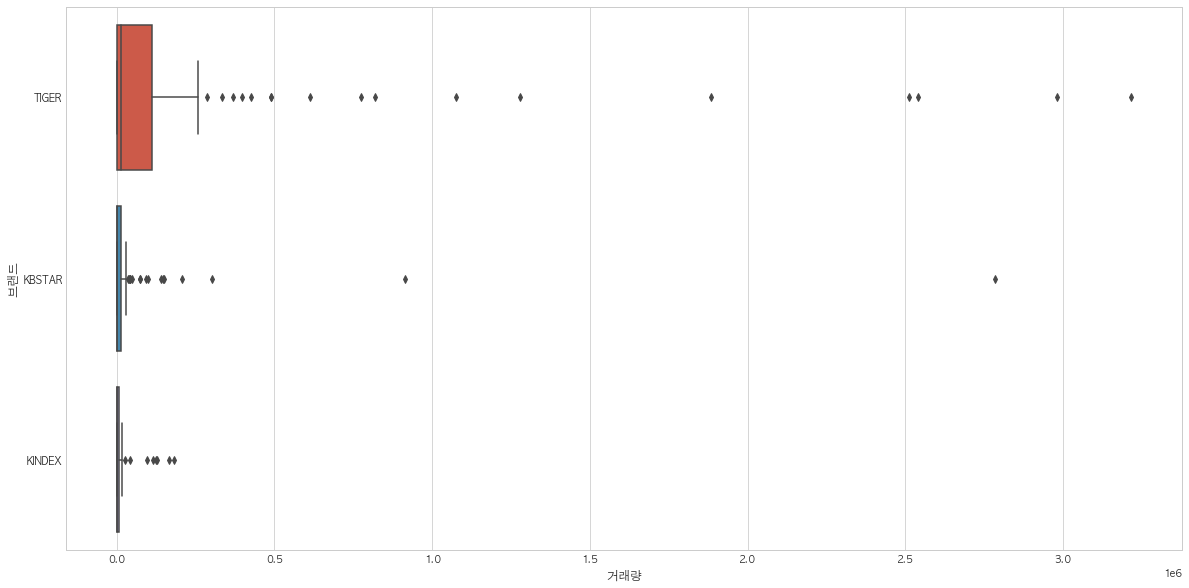

In [202]:
plt.figure(figsize= (20,10))

sns.boxplot(data= df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], x= "거래량", y= '브랜드')

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

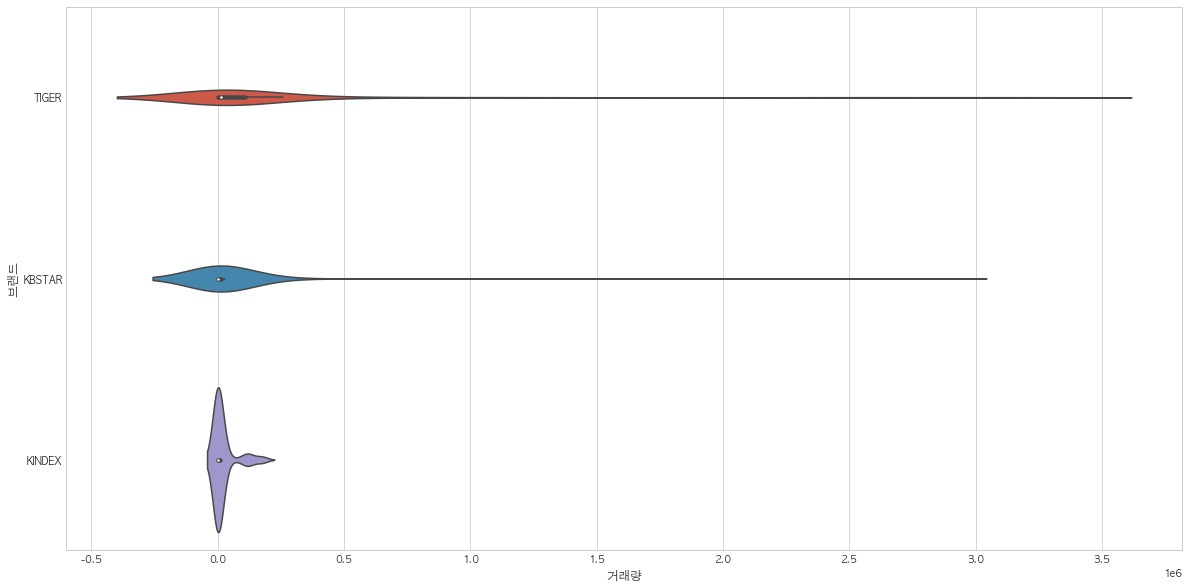

In [203]:
plt.figure(figsize= (20,10))

sns.violinplot(data= df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])], x= "거래량", y= '브랜드')

In [206]:
# "마이티", "마이다스", "흥국" 만 봅니다.

df[df["브랜드"].isin(["마이티", "마이다스", "흥국" ])]

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
352,403790,1,마이다스 KoreaStock액티브,20570,5,-65,-0.31,20573.0,NaN,348,7,108,국내 시장지수,마이다스,False,False,False
381,137930,3,마이다스 200커버드콜5%OTM,14590,5,-75,-0.51,14611.0,-2.2660,3,0,88,국내 파생,마이다스,False,False,False
393,159800,1,마이티 코스피100,30240,3,0,0.00,30058.0,-2.4831,0,0,85,국내 시장지수,마이티,False,False,False
454,292340,2,마이티 200커버드콜ATM레버리지,10245,3,0,0.00,10235.0,0.3428,0,0,61,국내 업종/테마,마이티,False,True,False


In [208]:
# "마이티", "마이다스", "흥국" 의 기술통계 값 보기
df[df["브랜드"].isin(["마이티", "마이다스", "흥국" ])].describe()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,3.000000,4.000000,4.00,4.00000
mean,1.750000,18911.250000,4.000000,-35.000000,-0.2050,18869.250000,-1.468767,87.750000,1.75,85.50000
std,0.957427,8657.734861,1.154701,40.620192,0.2504,8578.536331,1.572614,173.505764,3.50,19.26136
min,1.000000,10245.000000,3.000000,-75.000000,-0.5100,10235.000000,-2.483100,0.000000,0.00,61.00000
25%,1.000000,13503.750000,3.000000,-67.500000,-0.3600,13517.000000,-2.374550,0.000000,0.00,79.00000
50%,1.500000,17580.000000,4.000000,-32.500000,-0.1550,17592.000000,-2.266000,1.500000,0.00,86.50000
75%,2.250000,22987.500000,5.000000,0.000000,0.0000,22944.250000,-0.961600,89.250000,1.75,93.00000
max,3.000000,30240.000000,5.000000,0.000000,0.0000,30058.000000,0.342800,348.000000,7.00,108.00000


### 유형에 따른 거래량

<AxesSubplot:xlabel='거래량', ylabel='유형'>

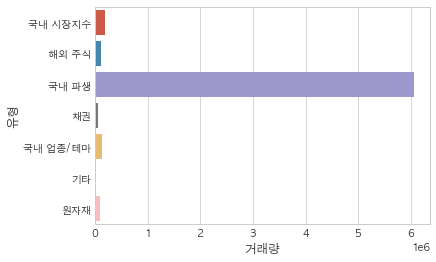

In [210]:
# 유형에 따른 평균 거래량을 barplot으로 시각화 합니다.

sns.barplot(data = df, x= "거래량", y= "유형", ci=None)

In [217]:
# 위 그래프의 유형에 따른 평균 거래량을 직접 groupby를 통해 구합니다.
df.groupby(by= "유형")["거래량"].mean().sort_values(ascending=True)

유형
기타          1.264235e+04
채권          5.491760e+04
원자재         1.000204e+05
해외 주식       1.060432e+05
국내 업종/테마    1.285087e+05
국내 시장지수     1.891802e+05
국내 파생       6.053110e+06
Name: 거래량, dtype: float64

### 유형에 따른 거래대금

<AxesSubplot:xlabel='거래대금(백만)', ylabel='유형'>

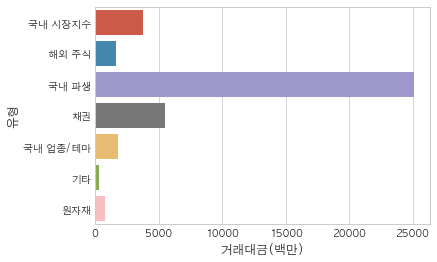

In [220]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 barplot 으로 그립니다.
sns.barplot(data= df, x= "거래대금(백만)",y="유형", ci=None)

In [224]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 groupby를 통해 구합니다.
# 좀 더 다양한 연산 가능 
df.groupby(by="유형")["거래대금(백만)"].mean().sort_values(ascending=False)

유형
국내 파생       25066.032258
채권           5505.733333
국내 시장지수      3774.731343
국내 업종/테마     1850.960000
해외 주식        1688.776860
원자재           761.000000
기타            314.096774
Name: 거래대금(백만), dtype: float64

In [227]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 pivot_table을 통해 구합니다. - 평균 계산 
# 정렬할 때 어떤 값을 기준으로 해줄 지 명시해주어야 함
pd.pivot_table(data= df, index= "유형", values = "거래대금(백만)").sort_values("거래대금(백만)",ascending=False)

,거래대금(백만)
유형,
국내 파생,25066.032258
채권,5505.733333
국내 시장지수,3774.731343
국내 업종/테마,1850.960000
해외 주식,1688.776860
원자재,761.000000
기타,314.096774


### 유형에 따른 시가총액

<AxesSubplot:xlabel='시가총액(억)', ylabel='유형'>

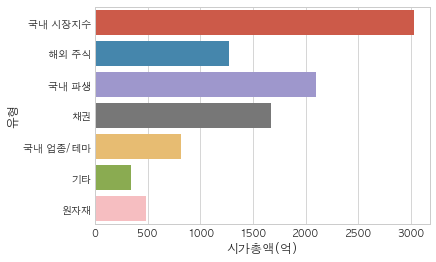

In [230]:
# 유형에 따른 평균 시가총액(억) 에 대한 시각화를 합니다.
sns.barplot(data= df, x= "시가총액(억)", y= '유형',ci=None)


In [236]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 groupby를 통해 구합니다.
df.groupby(by= "유형")["시가총액(억)"].mean().sort_values(ascending=True)

# df.groupby(by="유형")["시가총액(억)"].max().sort_values(ascending=True)

유형
원자재          2245
기타           2577
국내 업종/테마    15848
채권          19435
국내 파생       20759
해외 주식       30287
국내 시장지수     53815
Name: 시가총액(억), dtype: int64

In [237]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data= df, index= "유형", values = "시가총액(억)").sort_values("시가총액(억)",ascending=False)

,시가총액(억)
유형,
국내 시장지수,3027.910448
국내 파생,2098.322581
채권,1675.050000
해외 주식,1272.553719
국내 업종/테마,820.485000
원자재,489.428571
기타,337.967742


### 유형에 따른 3개월 수익률

<AxesSubplot:xlabel='3개월수익률', ylabel='유형'>

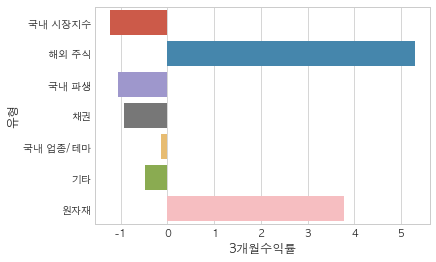

In [239]:
# 유형에 따른 평균 3개월수익률에 대한 시각화를 합니다.

sns.barplot(data=df, x="3개월수익률",y="유형",ci=None)

In [243]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 groupby를 통해 구합니다.

df.groupby(by="유형")["3개월수익률"].mean().sort_values(ascending=True)

유형
국내 시장지수    -1.223369
국내 파생      -1.052552
채권         -0.937631
기타         -0.478948
국내 업종/테마   -0.133653
원자재         3.779757
해외 주식       5.286103
Name: 3개월수익률, dtype: float64

In [250]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data= df, index= "유형",values= "3개월수익률").sort_values("3개월수익률",ascending=True)


,3개월수익률
유형,
국내 시장지수,-1.223369
국내 파생,-1.052552
채권,-0.937631
기타,-0.478948
국내 업종/테마,-0.133653
원자재,3.779757
해외 주식,5.286103


## 여러 개의 변수로 서브플롯 그리기
### PairGrid와 barplot 으로 서브플롯 그리기


* PairGrid는 한번에 서브플롯을 쉽게 그려볼 수 있는 장점이 있지만 아쉽게도 share axis in PairGrid는 지원하지 않고 있습니다.
* 참고 : https://github.com/mwaskom/seaborn/issues/1032

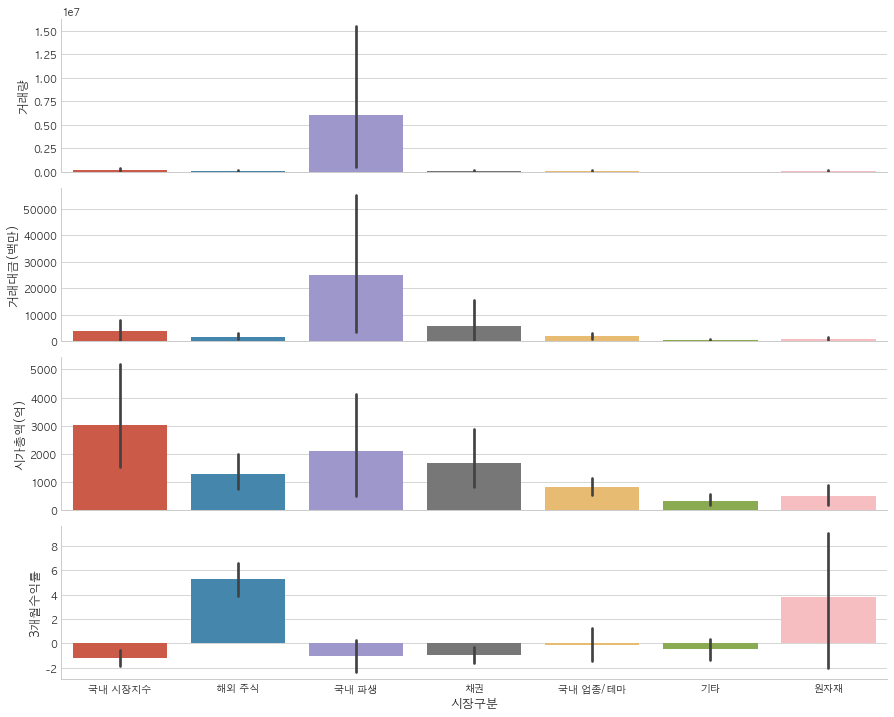

In [254]:
# PairGrid 와 barplot을 한번에 서브플롯으로 그립니다.
# 유형에 따른 "거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률" 에 대한 시각화를 합니다.

# 도화지 
g = sns.PairGrid(data= df, x_vars= "유형",y_vars= ["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"],aspect = 5)
g.map(sns.barplot)
g.set(xlabel ="시장구분")

### subplots를 통한 시각화

조금더 세부적으로 구분해서 그리고 싶을 때


In [255]:
row_cols = ["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"]

In [261]:
for rcol in enumerate(row_cols):
    print(rcol)

(0, '거래량')
(1, '거래대금(백만)')
(2, '시가총액(억)')
(3, '3개월수익률')


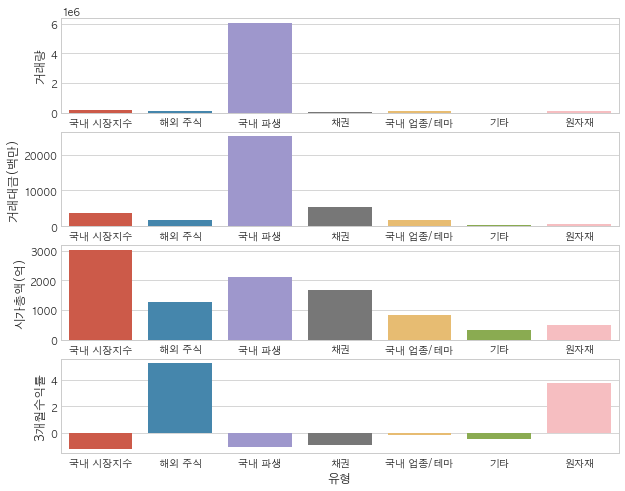

In [267]:
# 위 그래프를 직접 subplots 를 사용해 그려봅니다.

fig , axes = plt.subplots(nrows=len(row_cols),figsize = (10,8))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x="유형", y= rcol, ax= axes[i], ci= None)

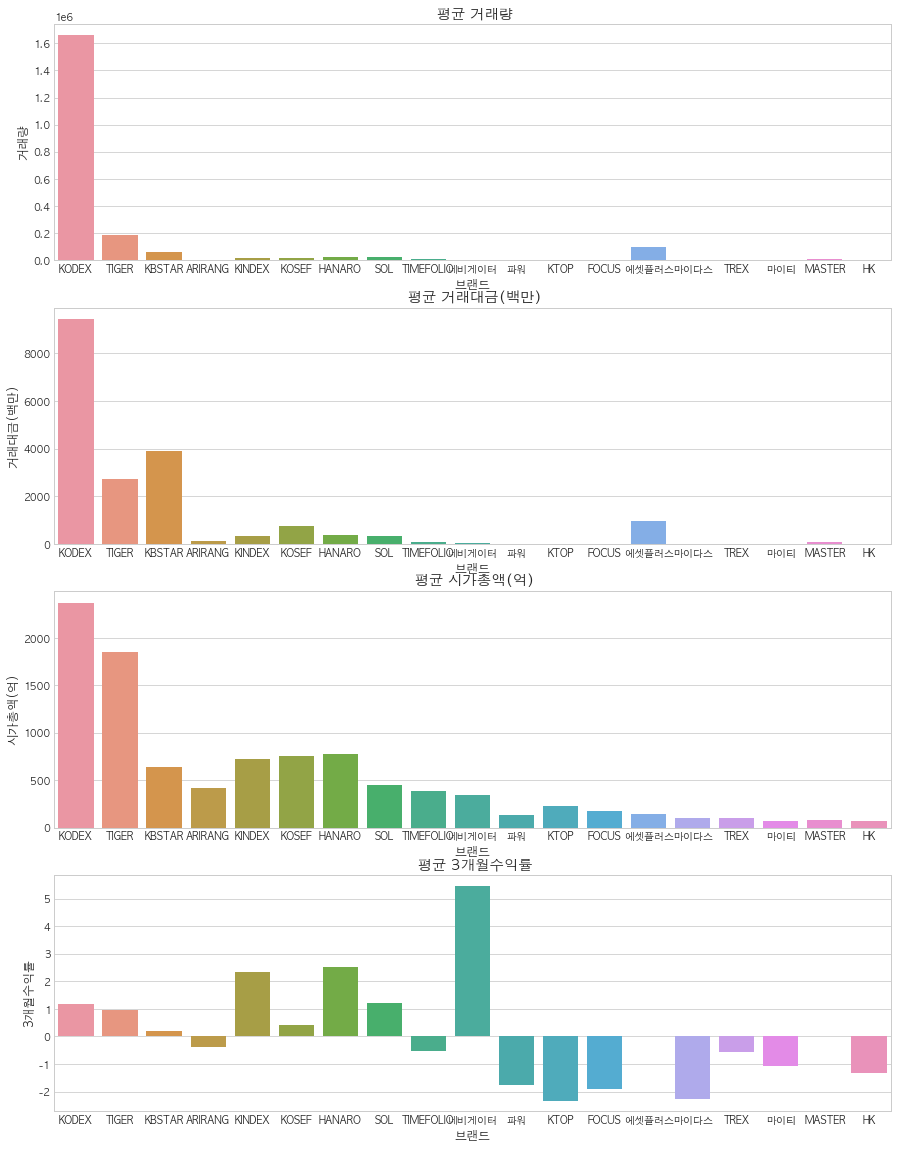

In [269]:
# 브랜드별 수치 데이터의 평균을 시각화 합니다.

fig , axes = plt.subplots(nrows=len(row_cols),figsize = (15,20))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x="브랜드", y= rcol, ax= axes[i], ci =None).set_title(f" 평균 {rcol}")

### 브랜드별 인버스 여부에 따른 시각화

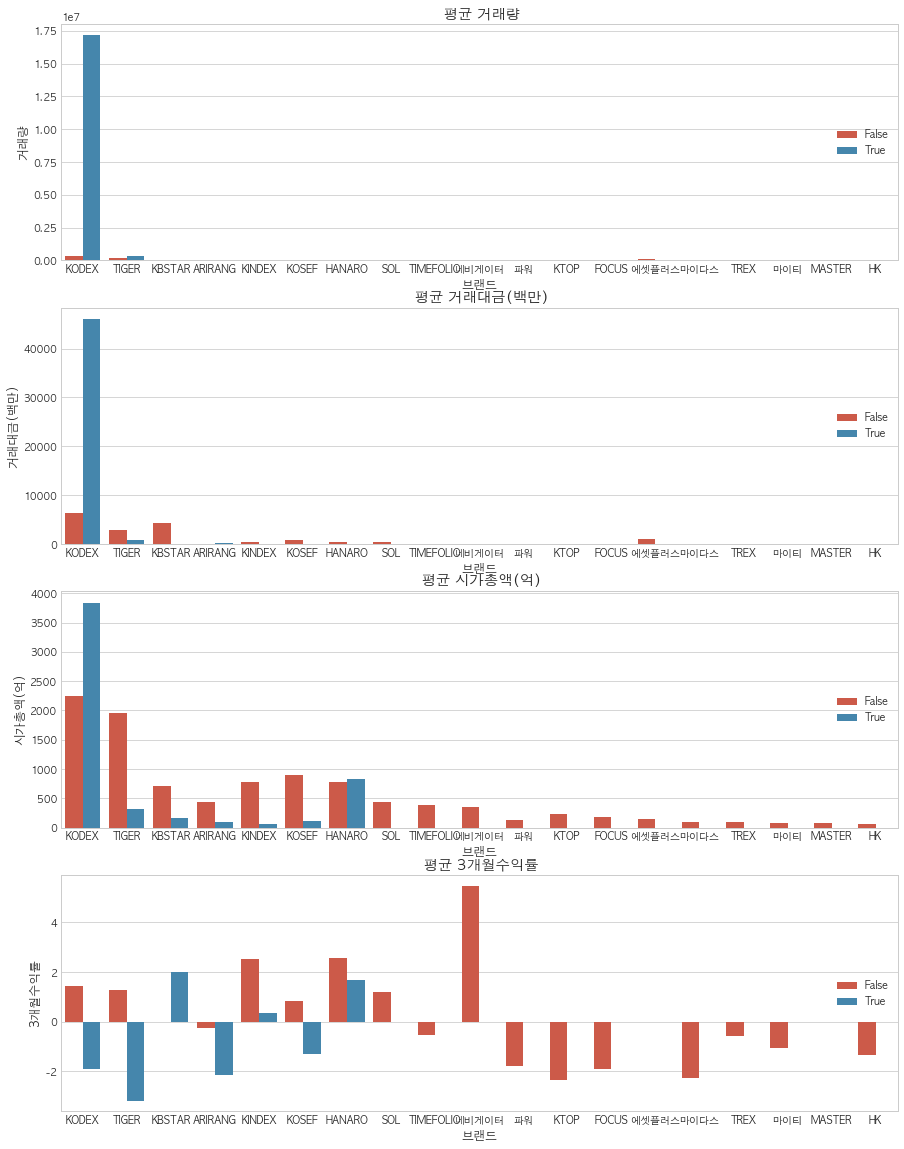

In [272]:
# subplots를 시각화 합니다. hue="인버스"를 적용해 봅니다.

fig , axes = plt.subplots(nrows=len(row_cols),figsize = (15,20))
for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x="브랜드", y= rcol, hue="인버스" , ax= axes[i], ci =None)
    g.set_title(f" 평균 {rcol}")
    g.legend(loc=5)

### 브랜드별 레버리지 여부에 따른 시각화

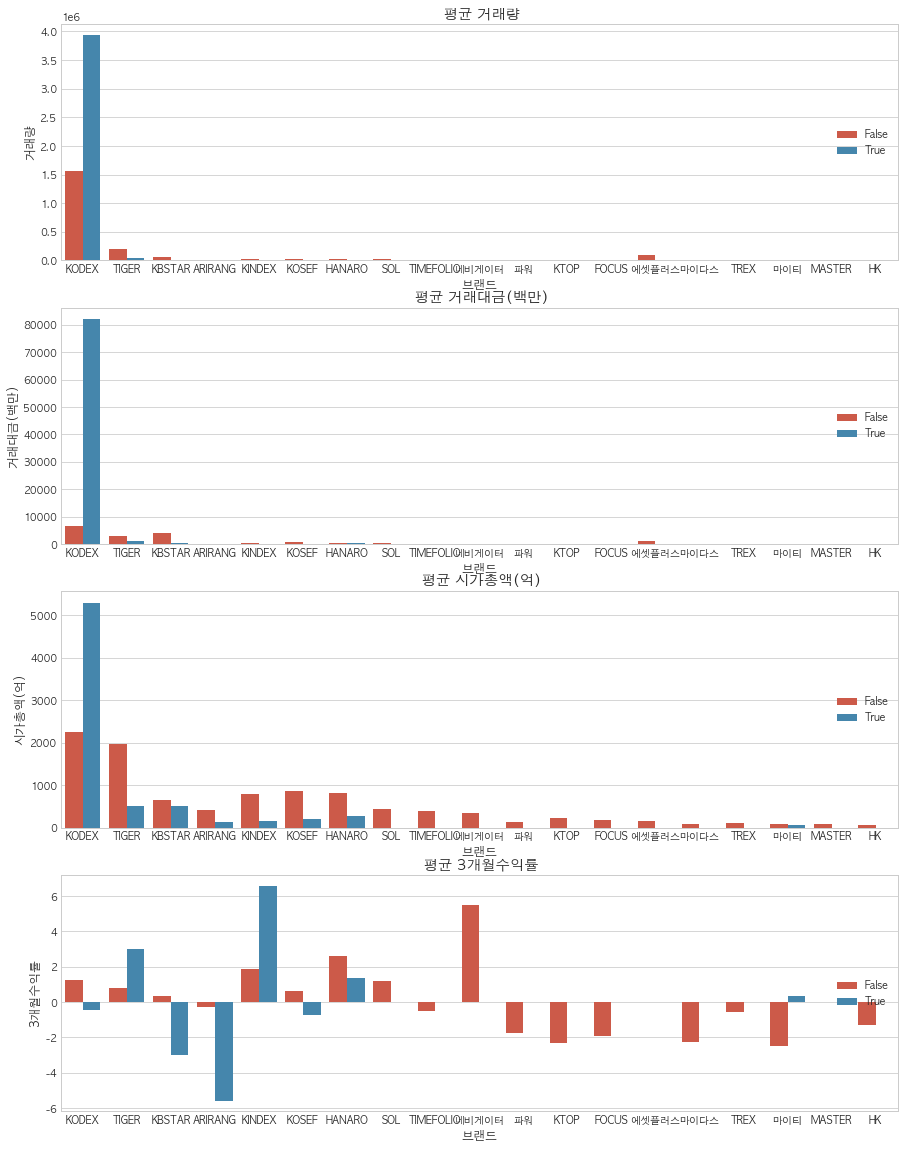

In [273]:
# subplots를 시각화 합니다. hue="레버리지"를 적용해 봅니다.
fig , axes = plt.subplots(nrows=len(row_cols),figsize = (15,20))
for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x="브랜드", y= rcol, hue="레버리지" , ax= axes[i], ci =None)
    g.set_title(f" 평균 {rcol}")
    g.legend(loc=5)

In [280]:
# 위에서 그린 서브플롯을 직접 groupby 로 구해봅니다.
gb = df.groupby(["브랜드","레버리지"] )[row_cols].mean()

gb.style.background_gradient()

### 유형에 따른 3개월 수익률 boxplot 
* barplot으로 그렸을 때 보이지 않던 데이터의 빈도수와 데이터의 분포를 확인할 수 있습니다.


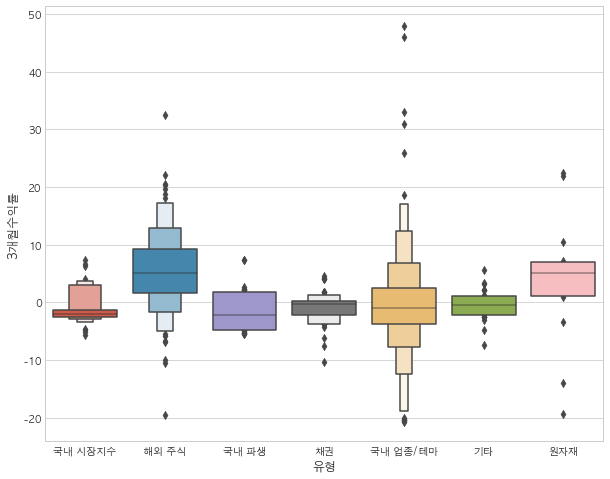

In [283]:
# boxplot 으로 x축에 "유형" y축에 "3개월수익률" 을 그려봅니다.
plt.figure(figsize= (10,8))
g = sns.boxenplot(data= df, x="유형", y= "3개월수익률")

In [285]:
# boxplot의 유형에 따른 3개월 수익률에 대한 기술통계 값을 구합니다.

df.groupby("유형")["3개월수익률"].describe()


,count,mean,std,min,25%,50%,75%,max
유형,,,,,,,,
국내 시장지수,65.0,-1.223369,2.704563,-5.6929,-2.483100,-2.00810,-1.279900,7.3370
국내 업종/테마,187.0,-0.133653,9.387926,-20.6944,-3.758300,-0.98010,2.476500,47.8672
국내 파생,31.0,-1.052552,3.893789,-5.5874,-4.787850,-2.24280,1.787150,7.3596
기타,31.0,-0.478948,2.554293,-7.3813,-2.162500,-0.50230,1.017850,5.5867
원자재,14.0,3.779757,11.303384,-19.3152,0.999025,5.12835,6.964300,22.4236
채권,58.0,-0.937631,2.616198,-10.4329,-2.168775,-0.24920,0.170525,4.6156
해외 주식,113.0,5.286103,7.328259,-19.5570,1.523300,5.00240,9.273500,32.5408



### subplots 로 유형에 대한 boxplot 그리기

In [287]:
row_cols 

['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']

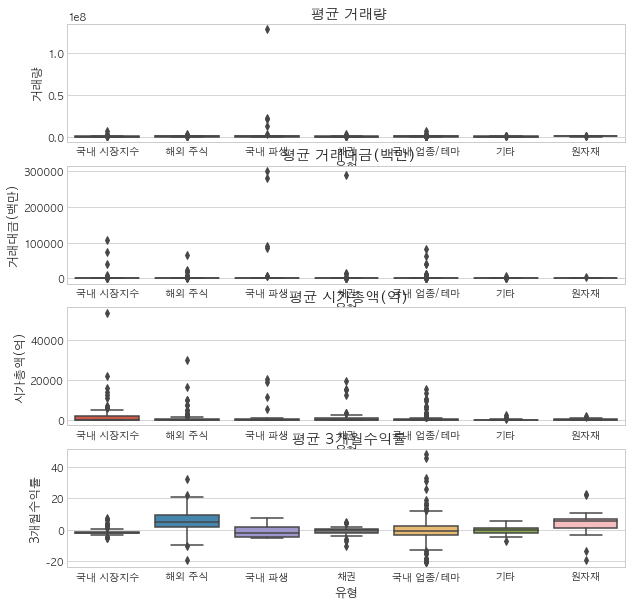

In [292]:
# subplots 를 통한 유형에 따른 수치데이터의 평균값 구하기

fig, axes = plt.subplots(nrows=len(row_cols), figsize =(10,10) )

for i , rcol in enumerate(row_cols):
    sns.boxplot(data=df,x="유형",  y= rcol, ax= axes[i]).set_title(f" 평균 {rcol}")

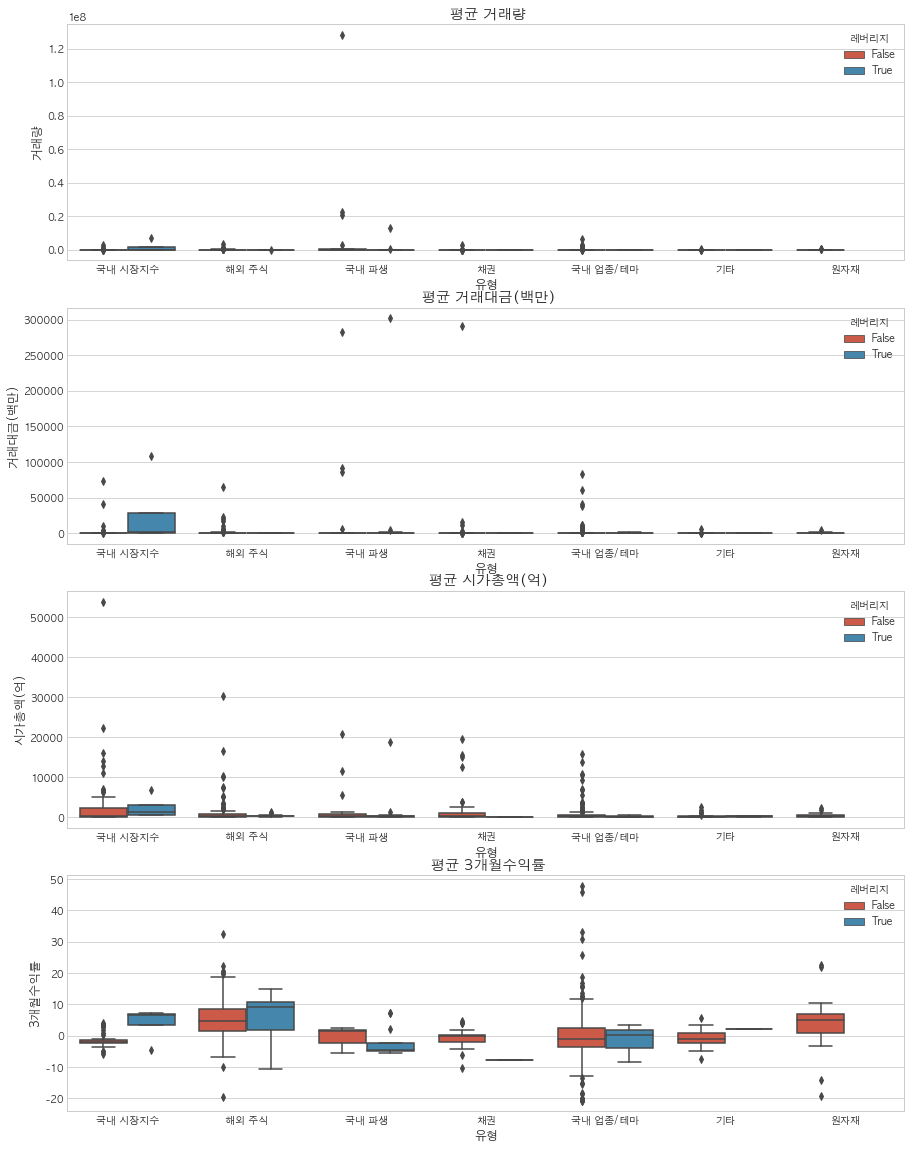

In [295]:
# hue="레버리지" 를 추가해서 그립니다.



fig, axes = plt.subplots(nrows=len(row_cols), figsize =(15,20) )

for i , rcol in enumerate(row_cols):
    sns.boxplot(data=df,x="유형",  y= rcol, hue= "레버리지",ax= axes[i]).set_title(f" 평균 {rcol}")

### subplots 로 유형에 대한  violinplot 그리기
* boxplot으로 그렸을 때 박스 안의 분포를 좀 더 자세히 그려줍니다.

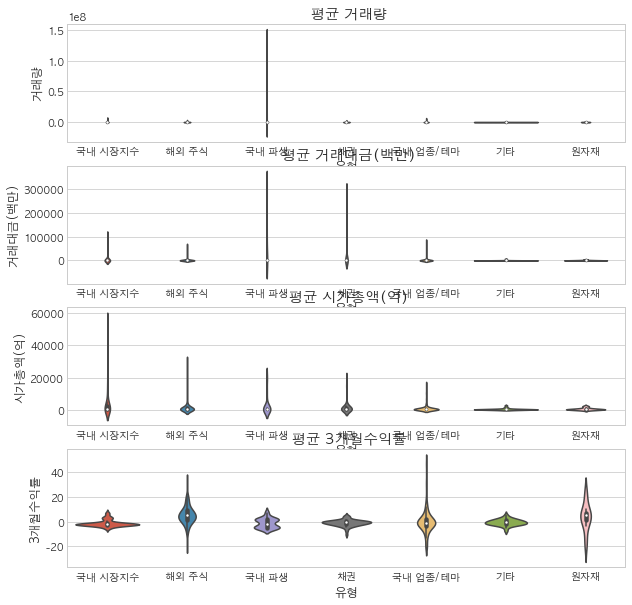

In [296]:
# 유형에 따른 violinplot 

fig, axes = plt.subplots(nrows=len(row_cols), figsize =(10,10) )

for i , rcol in enumerate(row_cols):
    sns.violinplot(data=df,x="유형",  y= rcol, ax= axes[i]).set_title(f" 평균 {rcol}")

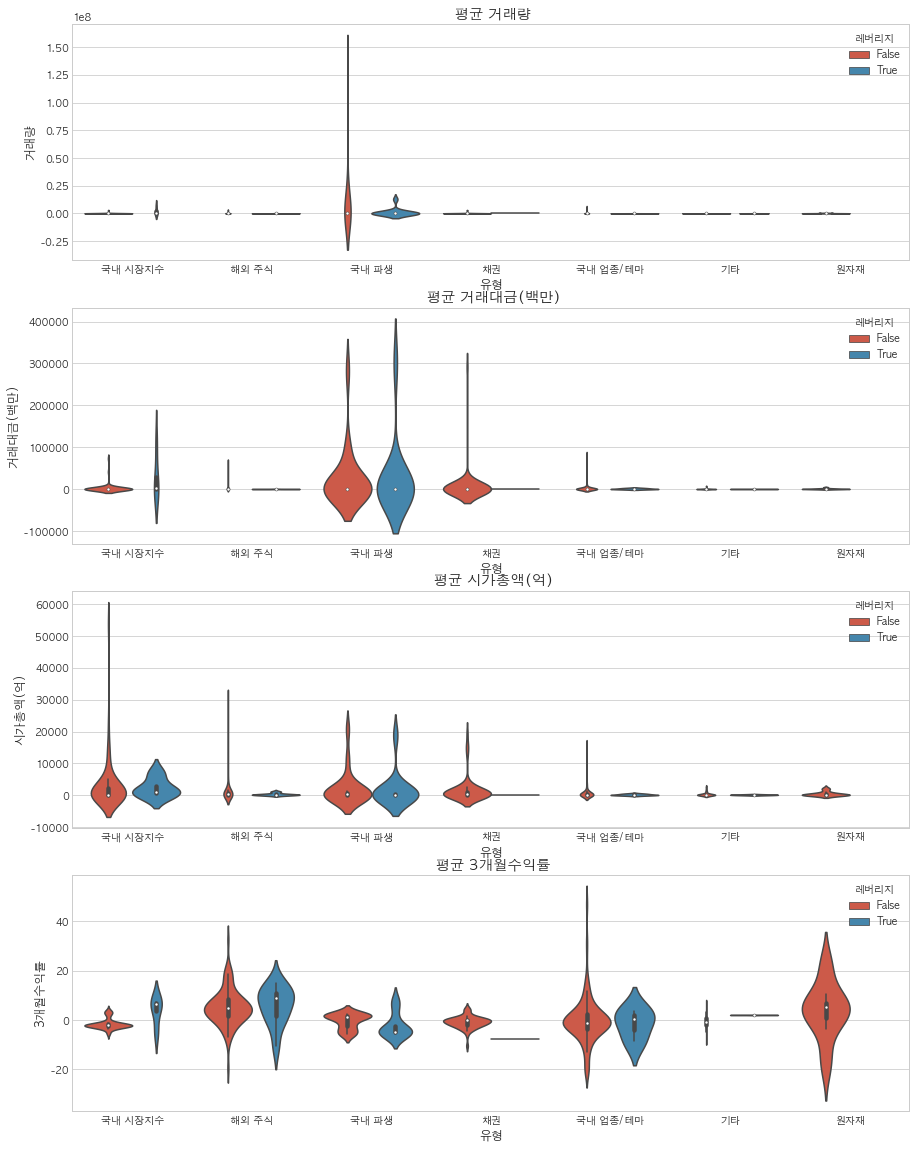

In [297]:
# 유형에 따른 violinplot 에 hue="레버리지" 적용하기


fig, axes = plt.subplots(nrows=len(row_cols), figsize =(15,20) )

for i , rcol in enumerate(row_cols):
    sns.violinplot(data=df,x="유형",  y= rcol, hue= "레버리지",ax= axes[i]).set_title(f" 평균 {rcol}")

### PairGrid 를 통해 여러 변수의 violinplot 그리기

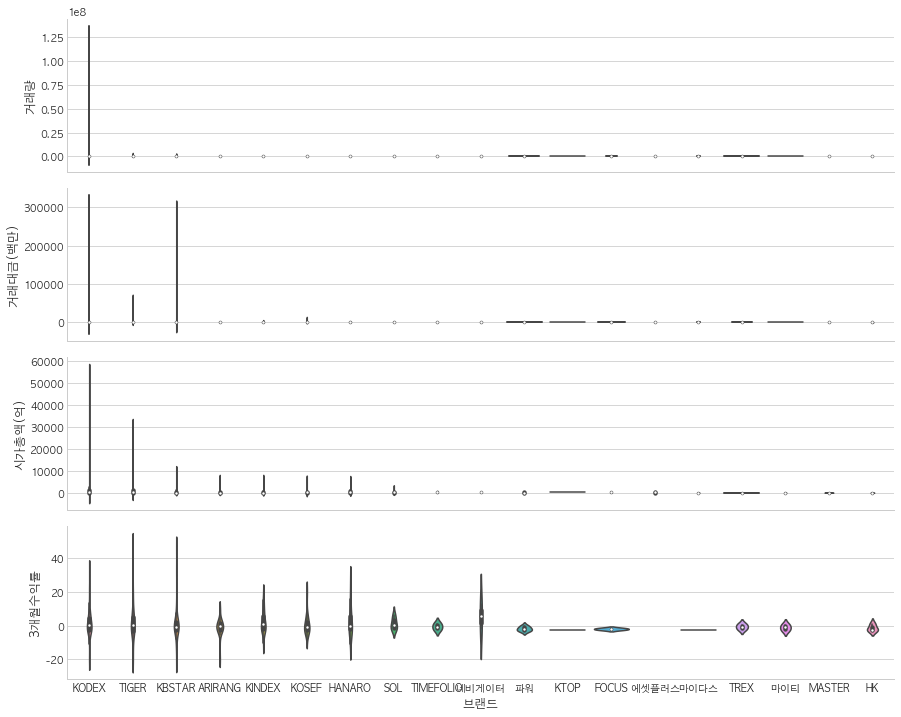

In [300]:
# 브랜드에 따른 여러 수치변수의 violinplot 를 PairGrid로 그리기
# aspect = figsize가 아니라 상대적인 크기로 지정 

g = sns.PairGrid(data= df, x_vars= "브랜드",y_vars= ["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"],aspect = 5)
g.map(sns.violinplot)
g.set(xlabel ="브랜드")

### subplots 로 브랜드에 대한 boxplot 그리기

In [303]:
df

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,39425,5,-175,-0.44,39456.0,-2.0239,1850963,73236,53815,국내 시장지수,KODEX,False,False,False
1,371460,4,TIGER 차이나전기차SOLACTIVE,20100,5,-225,-1.11,NaN,15.8779,3216944,65122,30287,해외 주식,TIGER,False,False,False
2,102110,1,TIGER 200,39445,5,-185,-0.47,39488.0,-1.9861,251033,9952,22188,국내 시장지수,TIGER,False,False,False
3,252670,3,KODEX 200선물인버스2X,2225,2,25,1.14,2222.0,2.3255,128211523,282593,20759,국내 파생,KODEX,True,False,False
4,153130,6,KODEX 단기채권,102990,5,-5,0.00,102986.0,0.1263,34183,3520,19435,채권,KODEX,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,285020,2,KBSTAR 200철강소재,8350,5,-115,-1.36,8359.0,-5.6825,8206,68,23,국내 업종/테마,KBSTAR,False,False,False
520,334700,5,KBSTAR 팔라듐선물인버스(H),5775,2,240,4.34,NaN,10.4790,3453,19,23,원자재,KBSTAR,True,False,True
521,287330,2,KBSTAR 200생활소비재,7755,5,-40,-0.51,7756.0,-7.7515,201,1,20,국내 업종/테마,KBSTAR,False,False,False
522,287310,2,KBSTAR 200경기소비재,10685,5,-120,-1.11,10684.0,-1.8174,12,0,15,국내 업종/테마,KBSTAR,False,False,False


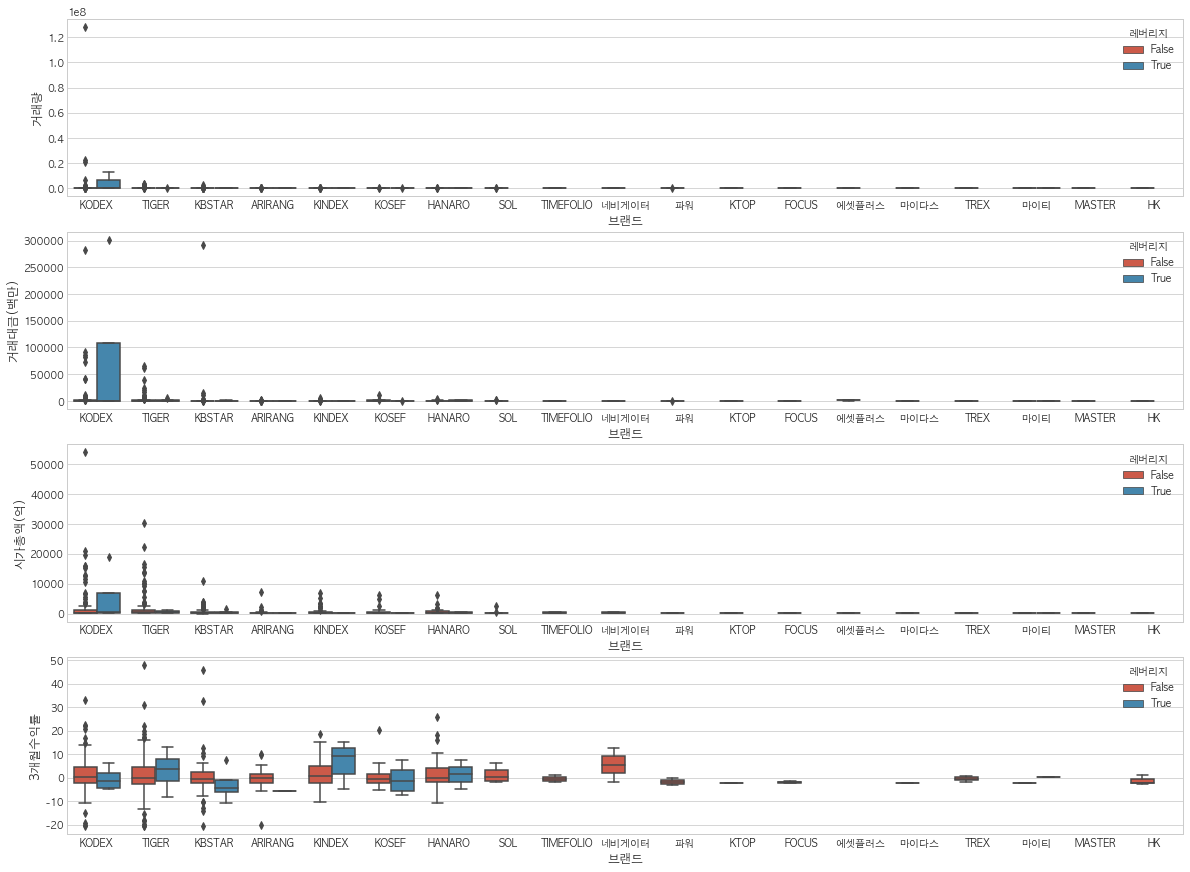

In [308]:
# 브랜드에 따른 여러 수치변수의 boxplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows= len(row_cols),figsize=(20,15))

for i, rcol in enumerate(row_cols):
    sns.boxplot(data= df , x="브랜드", y= rcol, hue="레버리지", ax= axes[i])
        

### subplots 로 브랜드에 대한 violinplot 그리기

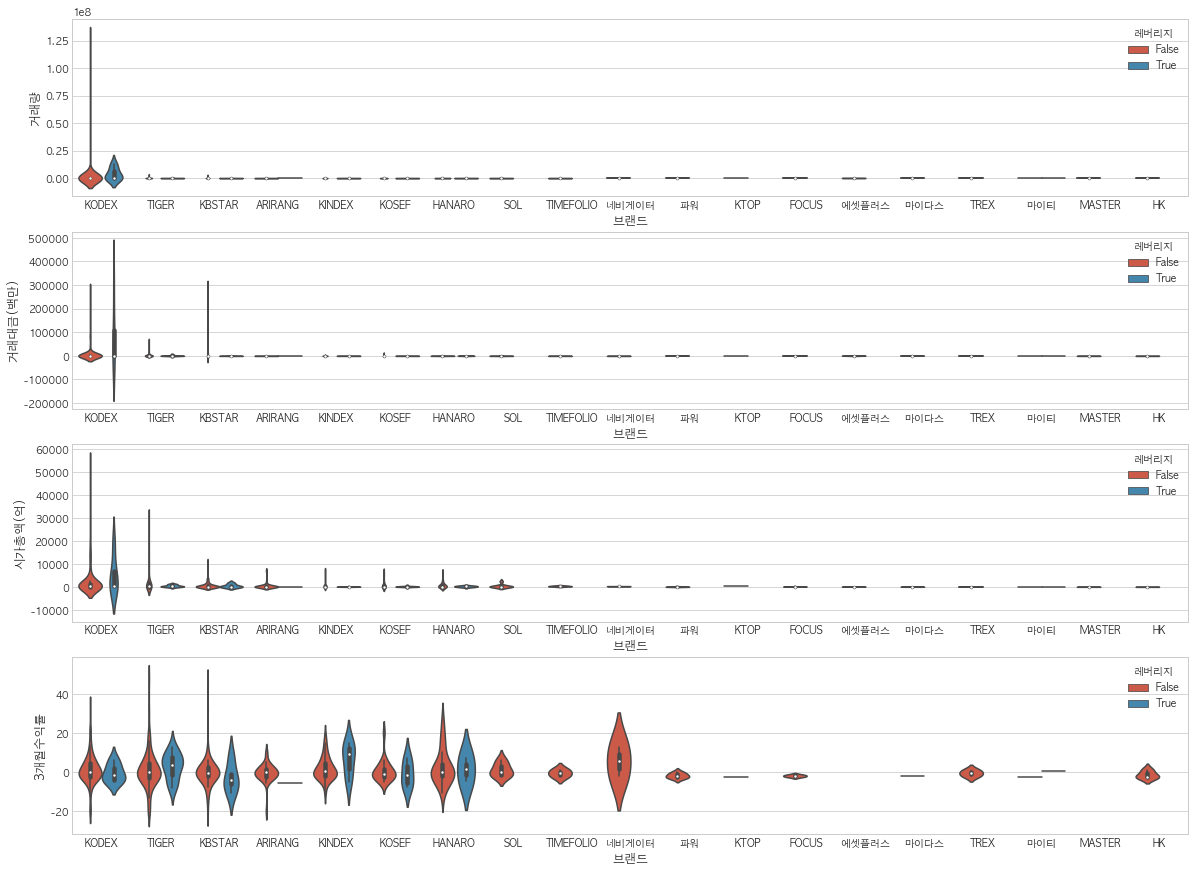

In [309]:
# 브랜드에 따른 여러 수치변수의 violinplot 을 subplots으로 그리기 : hue="레버리지"

# 브랜드에 따른 여러 수치변수의 boxplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows= len(row_cols),figsize=(20,15))

for i, rcol in enumerate(row_cols):
    sns.violinplot(data= df , x="브랜드", y= rcol, hue="레버리지", ax= axes[i])
        

## FacetGrid 를 통한 범주형 변수에 대한 서브플롯 그리기

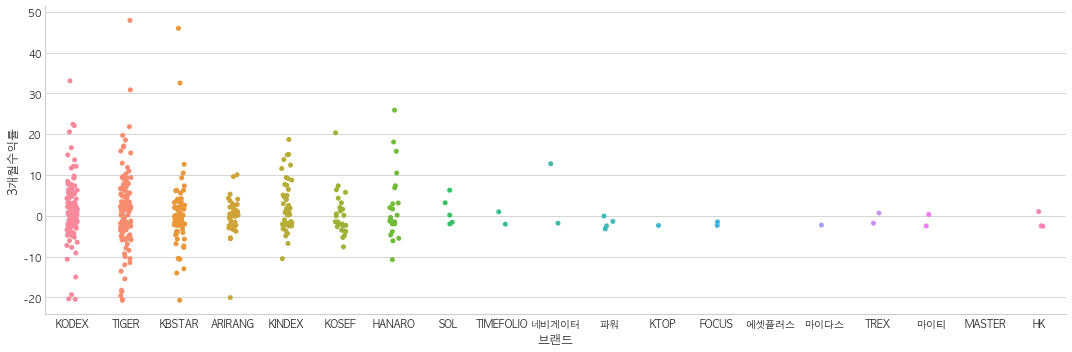

In [310]:
# catplot 을 통한 브랜드별 3개월 수익률
## catplot - relative size 
sns.catplot(data= df, x= "브랜드", y= "3개월수익률", aspect= 3)

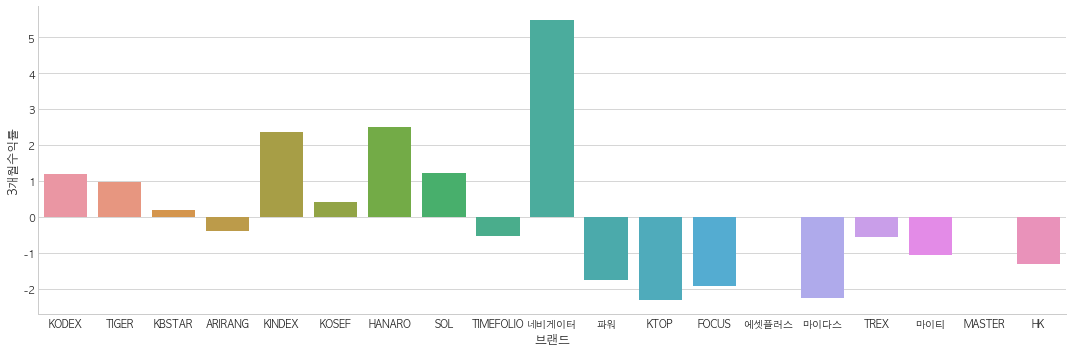

In [312]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="bar"
sns.catplot(data= df, x= "브랜드", y= "3개월수익률", aspect= 3, kind= "bar", ci=None)

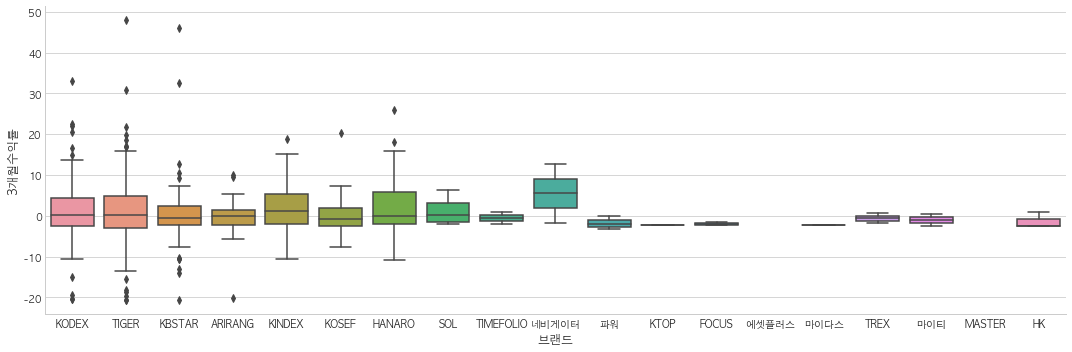

In [314]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="box"
sns.catplot(data= df, x= "브랜드", y= "3개월수익률", aspect= 3, kind= "box", ci=None)


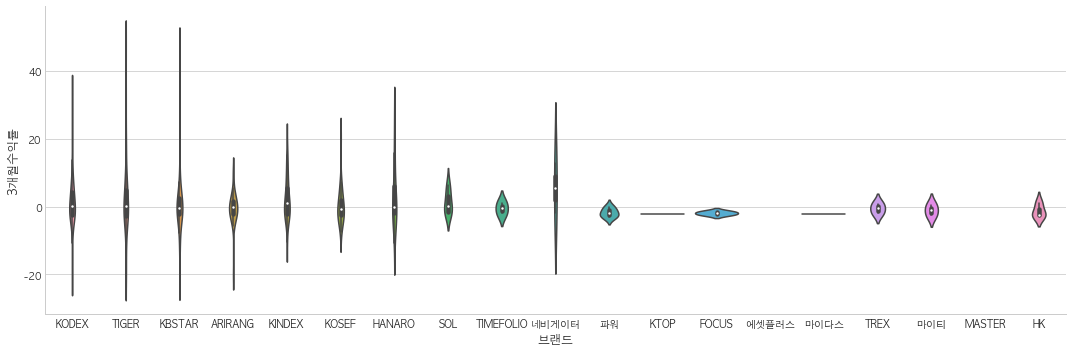

In [315]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="violin"
sns.catplot(data= df, x= "브랜드", y= "3개월수익률", aspect= 3, kind= "violin", ci=None)

### 특정 범주형 변수에 대한 서브플롯 그리기 - catplot
#### 브랜드 별 빈도수 - countplot

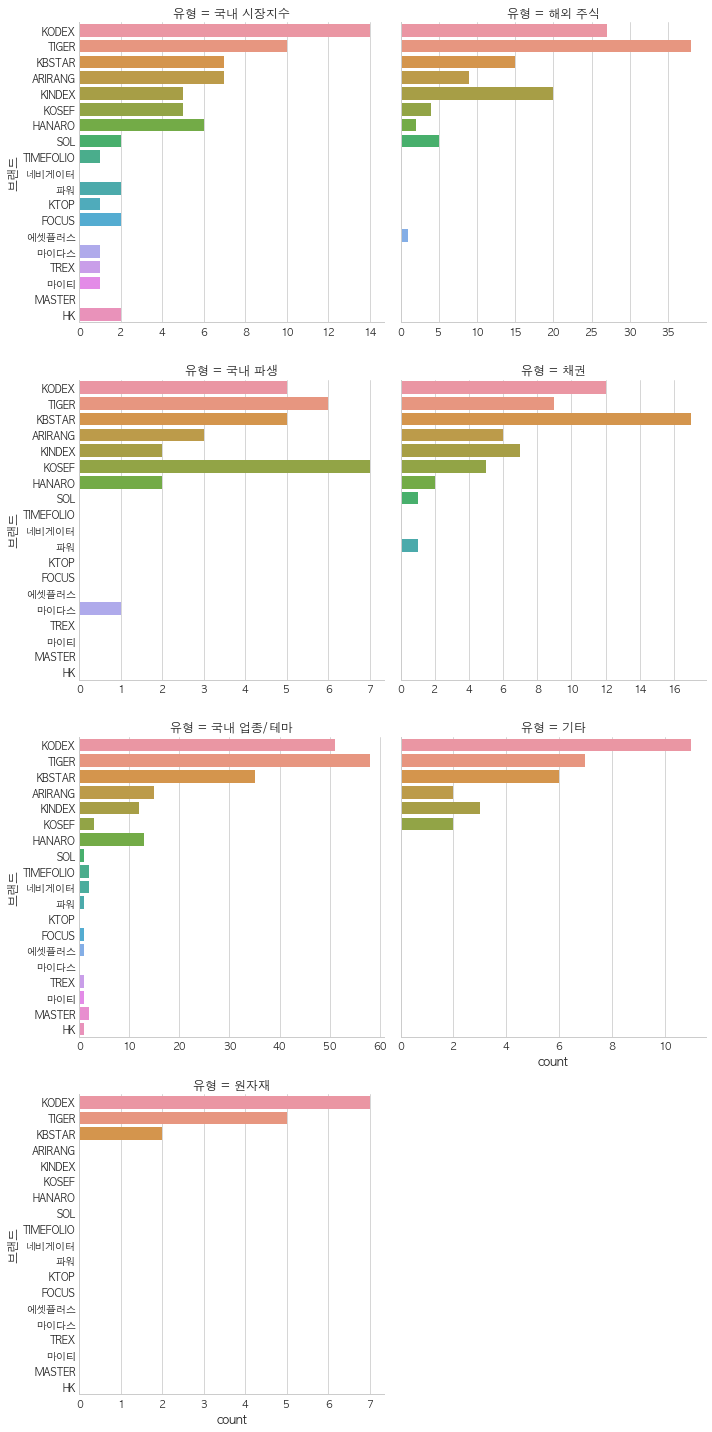

In [319]:
# pairgrid= x(Y)가 공유만 되는데  여기서는 공유 안하는 옵션이 가능해서 자료가 찌그러지지 않음 

sns.catplot(data= df, y ="브랜드", kind ="count", col ="유형", col_wrap = 2, sharex =False)

#### 브랜드별 3개월 수익률 - barplot

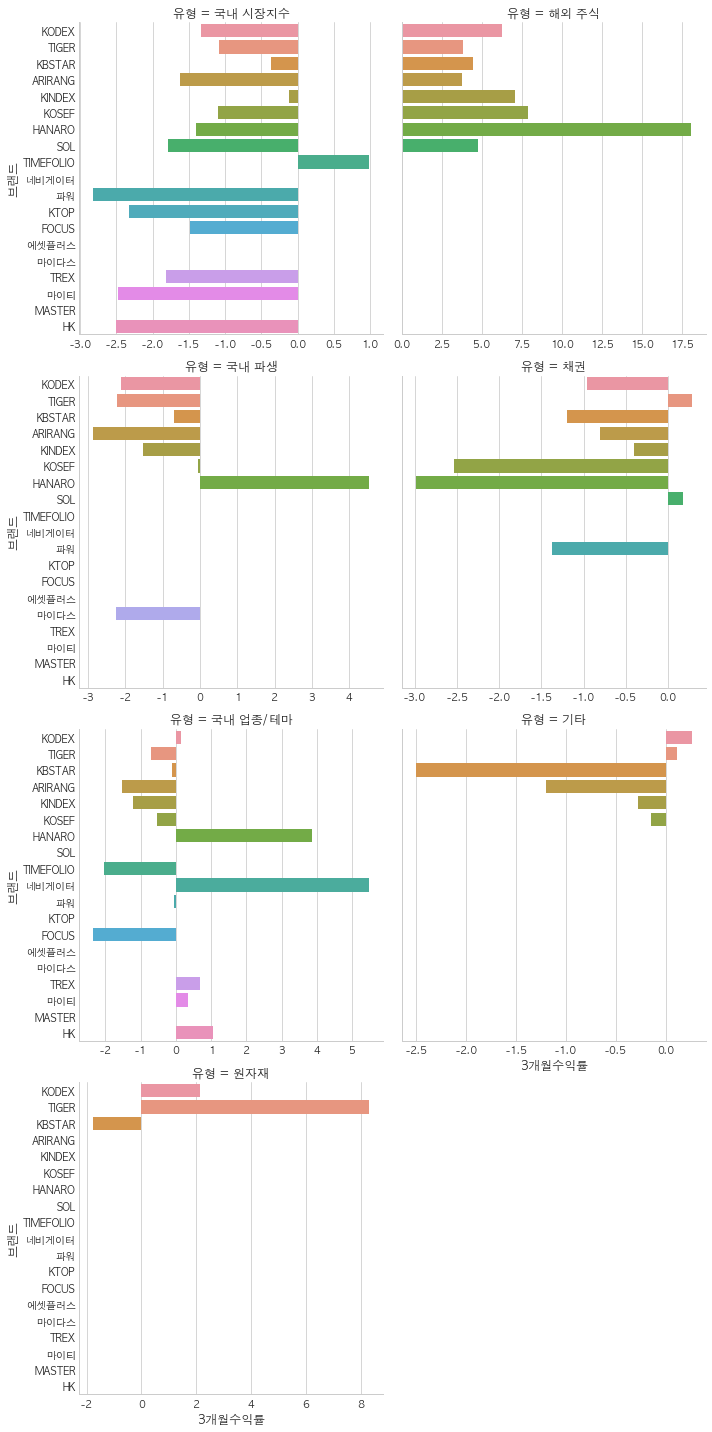

In [321]:
sns.catplot(data= df, y ="브랜드", x= "3개월수익률", kind ="bar", col ="유형", col_wrap = 2, sharex =False, ci = None)

#### 브랜드별 거래량 - barplot

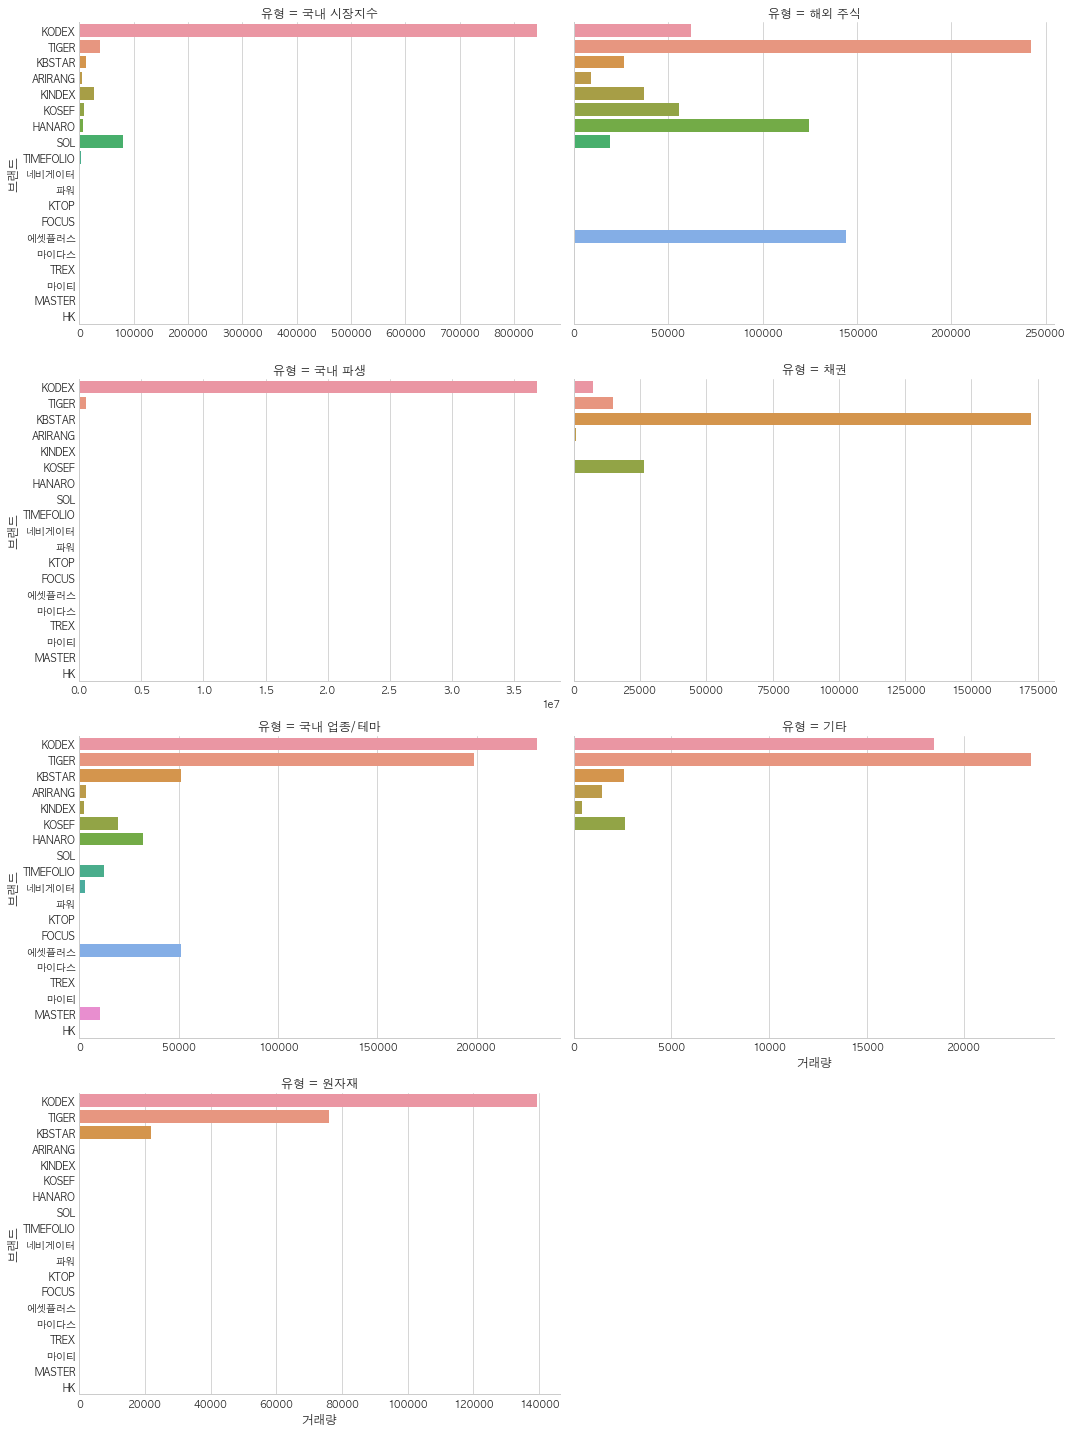

In [328]:

sns.catplot(data= df, y ="브랜드", x= "거래량", kind ="bar", col ="유형", col_wrap = 2, sharex =False, ci = None, aspect= 1.5)

## 해외 주식 ETF

In [333]:
# 유형이 "해외 주식"인 ETF만 가져옵니다.
# oversea

oversea = df[df["유형"] == "해외 주식"]
oversea

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
1,371460,4,TIGER 차이나전기차SOLACTIVE,20100,5,-225,-1.11,NaN,15.8779,3216944,65122,30287,해외 주식,TIGER,False,False,False
6,133690,4,TIGER 미국나스닥100,86770,5,-260,-0.30,NaN,9.3712,238589,20700,16556,해외 주식,TIGER,False,False,False
19,360750,4,TIGER 미국S&P500,14010,2,20,0.14,NaN,6.6636,426953,5987,10339,해외 주식,TIGER,False,False,False
20,381170,4,TIGER 미국테크TOP10 INDXX,13135,5,-85,-0.64,NaN,11.8443,1279690,16824,9917,해외 주식,TIGER,False,False,False
22,394670,4,TIGER 글로벌리튬&2차전지SOLACTIVE(합성),12630,5,-230,-1.79,NaN,16.8559,819533,10401,7533,해외 주식,TIGER,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,217770,4,TIGER 원유선물인버스(H),5070,5,-195,-3.70,NaN,-19.5570,32717,166,43,해외 주식,TIGER,True,False,True
501,291890,4,KODEX MSCI EM선물(H),10080,5,-5,-0.05,NaN,1.5609,351,3,40,해외 주식,KODEX,False,False,True
504,267450,4,KBSTAR 미국장기국채선물인버스(H),7950,2,25,0.32,NaN,1.6025,696,5,40,해외 주식,KBSTAR,True,False,True
508,267490,4,KBSTAR 미국장기국채선물레버리지(합성 H),12590,5,-110,-0.87,NaN,-10.5949,1,0,38,해외 주식,KBSTAR,False,True,True


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

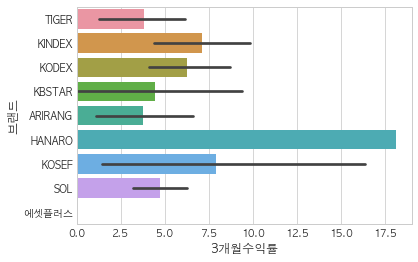

In [334]:
# "해외 주식"ETF의 브랜드별 "3개월수익률"을 시각화 합니다.

sns.barplot(data= oversea, x= "3개월수익률", y= "브랜드")

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

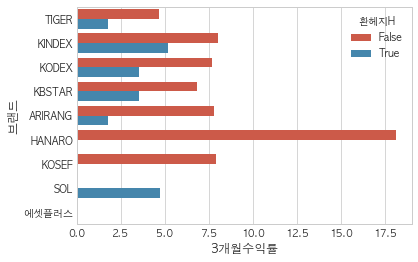

In [335]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 hue="환헤지H"로 시각화 합니다.
sns.barplot(data= oversea, x= "3개월수익률", y= "브랜드", hue="환헤지H",ci=None)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

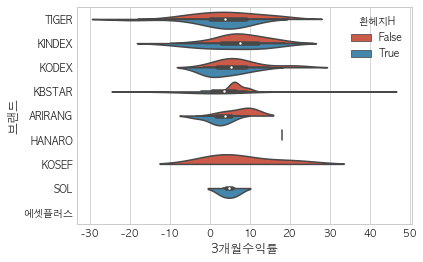

In [339]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 violinplot으로 시각화 합니다.
sns.violinplot(data= oversea, x= "3개월수익률", y= "브랜드", hue="환헤지H",ci=None, split=True)

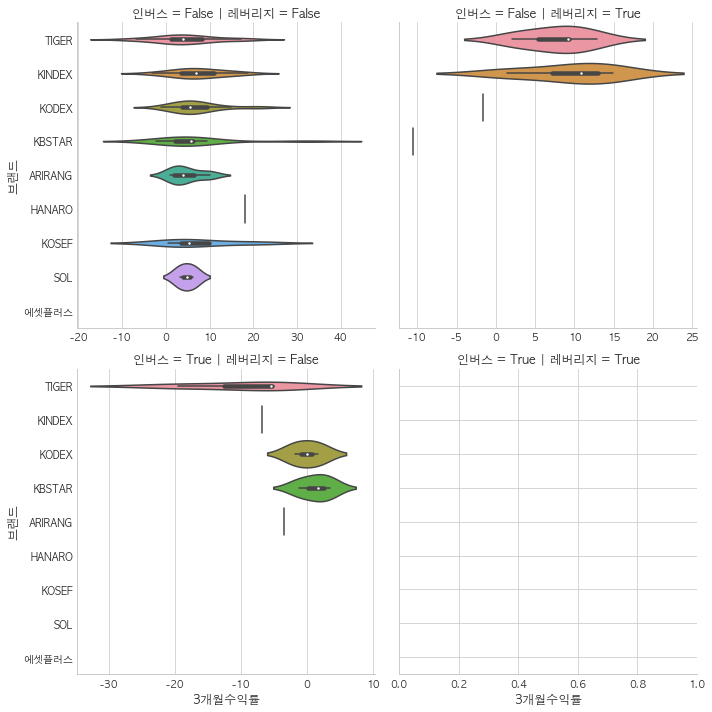

In [344]:
# 위에서 그린 그래프를 catplot을 통해 그리며  col="레버리지", row="인버스"로 시각화 합니다.
sns.catplot(data= oversea, x= "3개월수익률", y= "브랜드", kind= "violin", sharex = False, col="레버리지", row="인버스" )


## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [346]:
# 전체 데이터프레임에 대한 상관계수를 구합니다.
# corr
corr = df.corr()

In [367]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 만듬

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
print(np.ones_like(corr))

# triu- triangleup -> 윗부분을  남기고 다 0으로 만듦
mask = np.triu(np.ones_like(corr))
mask

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

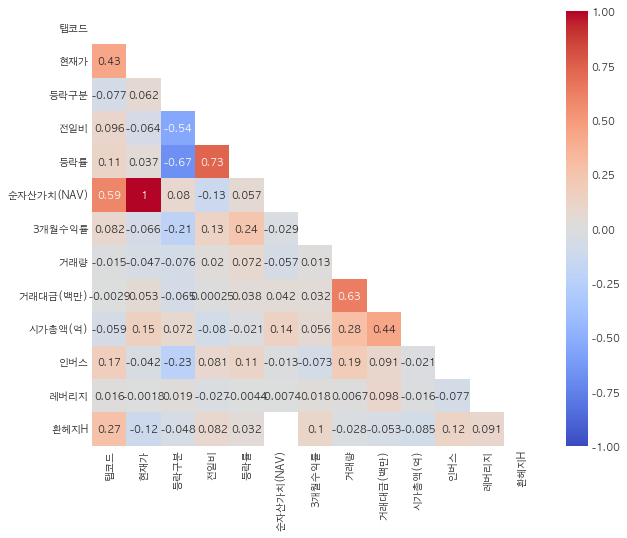

In [364]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
# annot = 각 값을 표시 
#mask - 반 날림
# vmin = 축 범위 최소값 vmax = 축 범위 최대값 

plt.figure(figsize= (10,8))
sns.heatmap(corr,annot=True, cmap= "coolwarm", vmin=-1, vmax=1, mask=mask)

### 양 혹은 음의 상관 계수가 높은 변수끼리의 regplot 그리기

<AxesSubplot:xlabel='전일비', ylabel='등락률'>

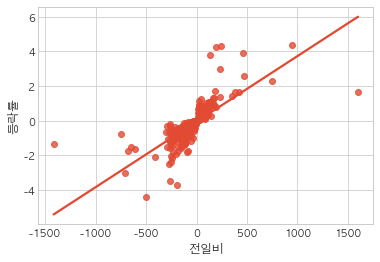

In [361]:
# regplot을 통해 양의 상관 계수가 높은 변수끼리 시각화 합니다.
# regplot - 회귀선
sns.regplot(data = df , x = "전일비", y="등락률", ci = None)

<AxesSubplot:xlabel='등락구분', ylabel='등락률'>

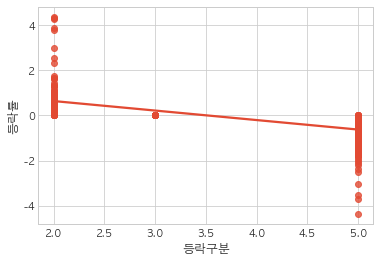

In [362]:
# regplot을 통해 음의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data = df , x = "등락구분", y="등락률", ci = None)

### 종목별 상관 계수

In [375]:
# select_dtypes 를 통해 object 타입을 제외한 타입을 제외하고 가져오록 합니다.
# 종목명을 인덱스로 만들어 줍니다.

# df_num = df.select_dtypes(exclude = object)
# df_num["종목명"] = df["종목명"]
# 에러 발생 -> 깊은 복사로 만들어주기 


df_num = df.select_dtypes(exclude = object).copy()
df_num["종목명"] = df["종목명"]

df_num = df_num.set_index("종목명")

In [376]:
# transpose 로 행과 열을 바꿉니다.
# df_t
df_t= df_num.T

In [381]:
# df_t의 데이터 타입을 float 으로 변경하고 상관 계수 구하기
# etf_corr

df_t.corr()
# 바로 하면 안나와 -> boolenad 같은 타입이 존재하기 때문에 
df_t.info()

etf_corr = df_t.astype(float).corr()
# 타입 바꿔주면 나오게 된다.

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 탭코드 to 환헤지H
Columns: 524 entries, KODEX 200 to KBSTAR 200산업재
dtypes: object(524)
memory usage: 53.3+ KB


* "KODEX 200" 과 상관계수가 높은 ETF 상위 10개

In [385]:
# "KODEX 200" 과 상관계수가 높은 ETF 상위 10개

etf_corr["KODEX 200"].sort_values(ascending=False).head(10)

종목명
KODEX 200                        1.000000
KODEX 2차전지산업                     0.999639
TIGER 차이나전기차SOLACTIVE            0.999598
TIGER 미국S&P500                   0.999570
TIGER 2차전지테마                     0.999561
TIGER 글로벌리튬&2차전지SOLACTIVE(합성)    0.999500
TIGER 미국테크TOP10 INDXX            0.999466
TIGER KRX BBIG K-뉴딜              0.999398
TIGER 차이나항셍테크                    0.999358
KBSTAR iSelect메타버스               0.999355
Name: KODEX 200, dtype: float64

* "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개

In [386]:
# "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개
etf_corr["KODEX 200"].sort_values().head(10)

종목명
TIGER MSCI Korea TR    -0.124036
KBSTAR 국채선물5년추종인버스     -0.116627
KBSTAR 국채선물5년추종        -0.116359
SOL KRX기후변화솔루션         -0.115185
KBSTAR KRX기후변화솔루션      -0.112341
HANARO MSCI Korea TR   -0.108615
FOCUS 혁신기업액티브          -0.108450
KOSEF 200              -0.107913
ARIRANG ESG가치주액티브      -0.105827
ARIRANG 코스피TR          -0.105802
Name: KODEX 200, dtype: float64

### 2X ETF의 상관계수

In [393]:
# 2X가 들어가는 ETF의 상관 계수만 가져오기
# etf_corr_2x
# 열 필터 + 행 필터 
# regex 로 포함되는 값 가져오기 

etf_corr_2x = etf_corr.filter(regex = "2X").filter(regex="2X", axis=0)
etf_corr_2x


종목명,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KBSTAR 200선물인버스2X,KOSEF 미국달러선물인버스2X,ARIRANG 200선물인버스2X,KOSEF 200선물인버스2X,KODEX 미국달러선물인버스2X,TIGER 미국달러선물인버스2X,KBSTAR KRX국채선물3년10년스티프너2X,KBSTAR KRX국채선물3년10년플래트너2X,KBSTAR 미국장기국채선물인버스2X(합성 H)
종목명,,,,,,,,,,,
KODEX 200선물인버스2X,1.000000,0.999999,0.999792,-0.095087,0.997572,0.996102,0.775641,-0.105620,-0.123248,-0.123329,0.823163
TIGER 200선물인버스2X,0.999999,1.000000,0.999816,-0.093932,0.997652,0.996204,0.776369,-0.104473,-0.122105,-0.122186,0.823647
KBSTAR 200선물인버스2X,0.999792,0.999816,1.000000,-0.074847,0.998778,0.997688,0.788277,-0.085434,-0.103110,-0.103191,0.831578
KOSEF 미국달러선물인버스2X,-0.095087,-0.093932,-0.074847,1.000000,-0.025564,-0.006916,0.554412,0.999760,0.999297,0.999293,0.523514
ARIRANG 200선물인버스2X,0.997572,0.997652,0.998778,-0.025564,1.000000,0.999822,0.817699,-0.036150,-0.053881,-0.053963,0.851272
KOSEF 200선물인버스2X,0.996102,0.996204,0.997688,-0.006916,0.999822,1.000000,0.828262,-0.017536,-0.035288,-0.035369,0.858318
KODEX 미국달러선물인버스2X,0.775641,0.776369,0.788277,0.554412,0.817699,0.828262,1.000000,0.545697,0.530737,0.530667,0.996716
TIGER 미국달러선물인버스2X,-0.105620,-0.104473,-0.085434,0.999760,-0.036150,-0.017536,0.545697,1.000000,0.999827,0.999825,0.511439
KBSTAR KRX국채선물3년10년스티프너2X,-0.123248,-0.122105,-0.103110,0.999297,-0.053881,-0.035288,0.530737,0.999827,1.000000,1.000000,0.490574


In [403]:
# np.ones_like로 heatmap의 마스크값 구하기
# mask_2x

mask_2x = np.triu(np.ones_like(etf_corr_2x))
mask_2x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

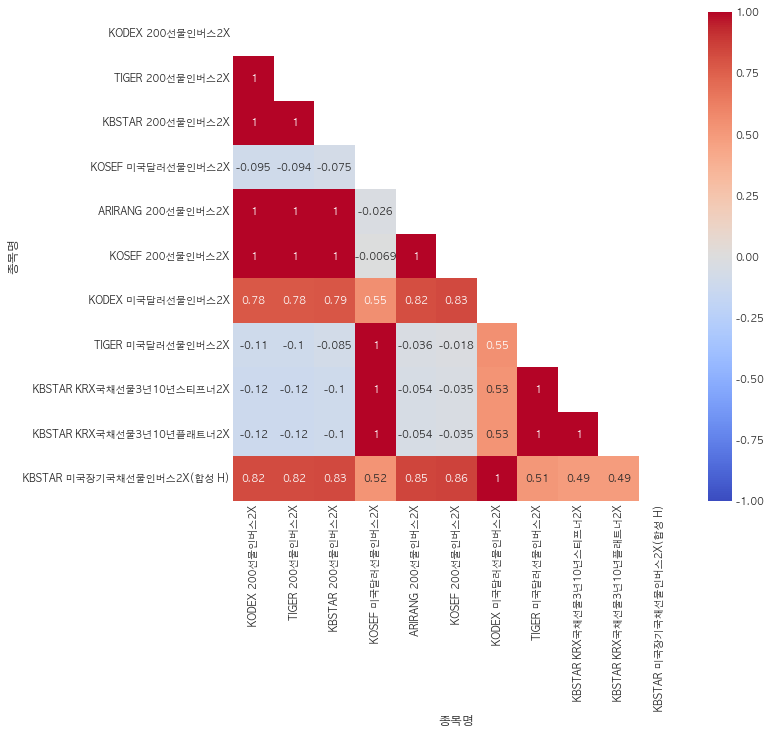

In [405]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기

plt.figure(figsize= (10,9))

sns.heatmap(etf_corr_2x,annot=True,cmap = "coolwarm", vmin  = -1 , vmax = 1, mask = mask_2x)

### 원유와 관련된 ETF의 상관계수 보기

In [407]:
# 원유가 들어가는 상관계수만 가져오기
# etf_corr_oil

etf_corr_oil = etf_corr.filter(regex= "원유").filter(regex= "원유", axis=0)

In [408]:
# np.ones_like로 heatmap의 마스크값 구하기
# mask_oil

mask_oil = np.triu(np.ones_like(etf_corr_oil))

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

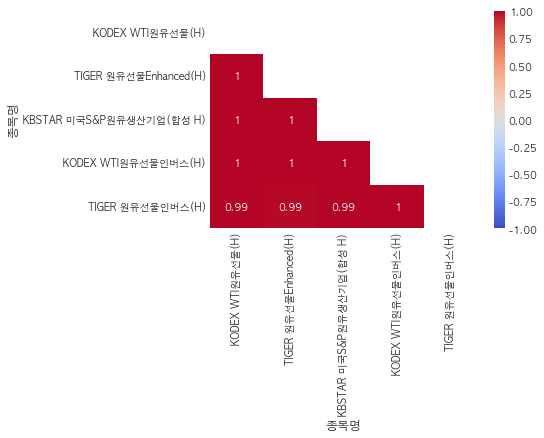

In [412]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기


sns.heatmap(data = etf_corr_oil,annot= True,cmap="coolwarm", vmin =-1, vmax =1, mask= mask_oil) 

## seaborn 공식문서

* seaborn 에 대해 좀 더 알고 싶다면 다음의 튜토리얼을 참고해 보세요.
* [User guide and tutorial — seaborn documentation](https://seaborn.pydata.org/tutorial.html)